<a href="https://colab.research.google.com/github/BatataNatna/Cours-git/blob/main/DA_avec_Python_Khedoudja_Rym_MERAD_Oph%C3%A9lie_ENGASSER_Mike_DURAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Data Analysis Project</h1></center>
<center><h2>M1 IA Elearning - mai 2023</h2></center>
<center><h3>Projet présenté par</br> Khedoudja Rym Merad, Mike Duran et Ophélie Engasser</h3></center>

In [ ]:
from google.colab import files

import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
uploaded = files.upload() # (mike: enlever car ajouter le fichier physiquemenet dans le drive.)
#gitHub_Path="https://raw.githubusercontent.com/MikeDuran-git/Python-data-analyses-Project/main/Projet.csv"
path = "./Projet.csv"
#df = pd.read_csv(gitHub_Path)
df = pd.read_csv(path)

Saving Projet.csv to Projet.csv


Nous sommes ici en présence d'un dataset présentant des données scientifiques relatives au sommeil. Chaque ligne correspond à un individu différent, caractérisé par son âge, son genre, ainsi que des variables décrivant la structure de son sommeil, ainsi que des facteurs exogènes tels que ses consommations en produits, et son exercice physique. Le principe de notre travail sera d'explorer la totalité de ce dataset afin d'en dégager du sens. Dans un premier temps, nous allons réaliser une analyse univariée pour explorer chaque variable, puis nous les mettrons en relation afin de commencer à déterminer des interactions et influences entre elles, dans l'optique d'en dégager une problématique. Enfin, nous envisageons de proposer une démarche de modèle.

**Types de variables**:</br>
**Age** : variable continue</br>
**Genre** : variable catégorielle</br>
**Heure de coucher et heure de lever** : dates : peuvent être intéressantes pour voir qui est lève tôt ou plutôt lève tard (selon l'âge peut être)</br>
**Durée de sommeil** : heures (en float)</br>
**Sleep efficiency** est une mesure de la qualité du sommeil exprimée sous forme de coefficient (théoriquement allant de 0 à 1)</br>
**REM-sleep, deep sleep et light sleep** : % de chacun de ces stades sur une nuit (en %)</br>
**Awakenings** : nombre de réveils nocturnes</br>
**Caffeine consumption** : consommations au cours des dernières 24h (mesuré en centilitres, allant de 0 à 200 cl)</br>
**Alcohol consumption** : consommations au cours des dernières 24h (mesuré en nombre de verres consommés, allant de 0 à 5)</br> 
**Smoking status** : consommations au cours des dernières 24h ; variable binaire Yes/No</br>
**Exercise frequency** : exercice au cours des dernières 24h (mesuré en nombre de fois où une activité a été réalisée)</br></br>

**Possible target** : qualité du sommeil (sleep efficiency)</br></br>

**Problématique retenue** : quels sont les facteurs qui influencent la qualité du sommeil ?</br></br>

**Quelques questions préalables** : 
- Y'a t il un effet de l'âge et du genre sur la qualité du sommeil ? 
- Y'a t il une corrélation entre la durée du sommeil et la qualité du sommeil ? Entre le nombre de réveils et la qualité du sommeil ?
- Y'a t il un effet des produits (caféine ,alcool, cigarette) et de l'exercice physique sur la qualité du sommeil ? Sur les temps des différents stades de sommeil (REM, deep, light) ? Certaines études ont montré que l'alcool par exemple destructure le sommeil, il serait intéressant de savoi si c'est le cas dans cet échantillon.

**Plan** : par types de variables et à chaque fois analyse univariée puis bivariée et étude de l'effet sur sleep efficiency
* age et genre sur sleep efficiency (variables endogènes)
* heures de coucher et de lever et durée de sommeil (habitudes de vie liées au sommeil)
* facteurs physiologiques
* facteurs hygiène de vie (variables exogènes)

Qu'est-ce qui peut influencer la qualité du sommeil ? Nous avons ici des variables endogènes (genre, âge), des variables plutôt exogènes.
https://ent2d.ac-bordeaux.fr/disciplines/sbssa/wp-content/uploads/sites/38/2018/01/BAC-2nde-S2-rythmes-biologiques.pdf


# Etude de la structure du dataset

In [ ]:
df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
# vérification de la structure du dataset et des types de données
df.shape

(452, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [ ]:
# vérification du nombre de NaN
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [ ]:
# modification des noms de colonnes pour pouvoir utiliser des ANOVA
df = df.rename(columns={
    "Wakeup time" : "Wakeup_time",
    "Sleep duration" : "Sleep_duration",
    "Sleep efficiency" : "Sleep_efficiency", 
    "REM sleep percentage" : "REM_sleep_percentage",
    "Deep sleep percentage" : "Deep_sleep_percentage",
    "Light sleep percentage" : "Light_sleep_percentage",
    "Caffeine consumption" : "Caffeine_consumption", 
    "Alcohol consumption" : "Alcohol_consumption", 
    "Exercise frequency" : "Exercise_frequency", 
    "Smoking status" : "Smoking_status"})

In [ ]:
df.head(1)

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0


# Quels sont les effets des variables endogènes (âge, genre) sur la qualité du sommeil ?

## Comment se répartissent les âges des individus ?

In [ ]:
df['Age'].describe()

count    452.000000
mean      40.285398
std       13.172250
min        9.000000
25%       29.000000
50%       40.000000
75%       52.000000
max       69.000000
Name: Age, dtype: float64

- 25% du dataset a moins de 29 ans.
- La médiane (50% de la distribution) est de 40 ans.
- La moyenne est de 40.29 ans (proche de la médiane, ce qui signifie qu'il semble exister peu de valeurs extrêmes qui pourraient influencer la moyenne).
- 75% des effectifs sont inferieurs à 52 ans.
- L'age max. est 69 ans et l'âge min de 9 ans (il y a donc des enfants).


In [ ]:
# coefficient de variation
sd_age = np.std(df['Age'], ddof=1) # écart-type non biaisé puisque nous le calculons sur l'échantillon
coef_variation_age = sd_age / df['Age'].mean() * 100
coef_variation_age

32.69733076664968

Le coefficient de variation est < 50% donc notre échantillon est homogène quant à l'âge.

In [ ]:
# vérification des NaN
df['Age'].isna().sum() 

0

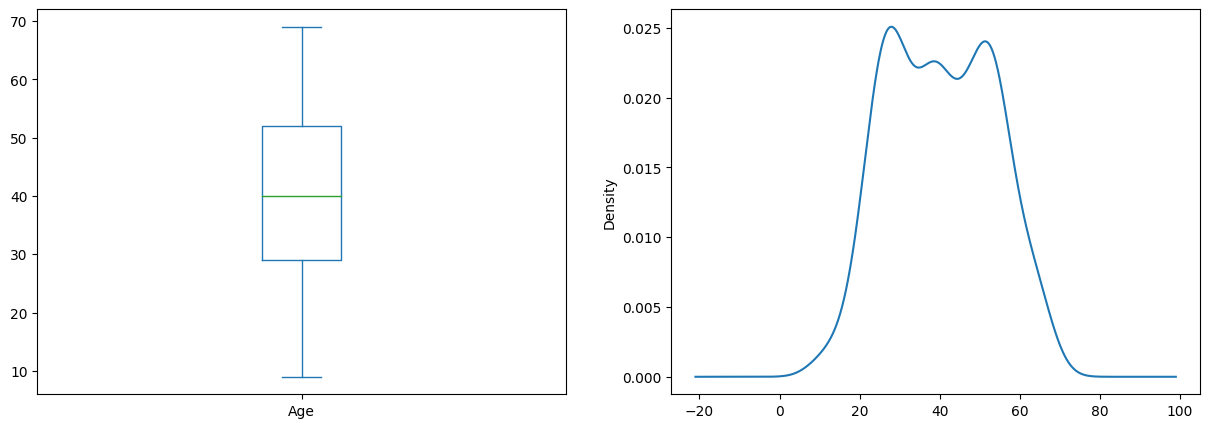

In [ ]:
# visualisons la distribution sur un boxplot et un density plot (avec plt)
plt.figure(figsize=(15, 5))
plt.subplot(121)
df['Age'].plot(kind="box")
plt.subplot(122)
df['Age'].plot(kind="density")
plt.show()

Pas d'outlier sur le boxplot, avec une distribution qui semble bien répartie, mais on voit quand même sur la courbe de densité une distribution d'allure bi-modale. Vérifions cela avec les paramètres de forme (skewness et kurtosis).

In [ ]:
# skewness pour l'asymétrie
df['Age'].skew()

0.03990014652808803

Le skewness est légèrement > 0, cela connote une légère asymétrie avec un skew à droite (majorité des données à gauche de la moyenne, c'est-à-dire plus d'individus jeunes dans l'échantillon).

In [ ]:
# kurtosis pour l'aplatissement
df['Age'].kurtosis()

-0.9446147215143337

Le kurtosis est < 3 ce qui suggère une courbe plus applatie que la courbe de Gauss, c'est-à-dire un étalement des âges plus important autour de la moyenne.

Skewness et kurtosis nous incitent à penser que la distribution de l'âge pour notre échantillon ne suite pas une loi normale. Vérifions-le à l'aide du test de Shapiro-Wilk.

In [ ]:
stat, p = shapiro(df['Age'])
print(stat, p)

0.9753724932670593 6.421402076739469e-07


La statistique de test W est signiticative (p<.01) donc on rejette l'hypothèse nulle H0 stipulant que la variable suit une loi normale. Nous pouvons en conclure que l'âge n'est pas distribué normalement, et nous pouvons affirmer cela avec un degré très faible de nous tromper
Cela signifie que d'autres facteurs que le hasard, interviennent dans la sélection de l'âge chez nos individus.  

### Vérifions si l'âge a un effet sur la qualité du sommeil

In [ ]:
correlation_matrix = df[['Age', 'Sleep_efficiency']].corr()
correlation_matrix

,Age,Sleep_efficiency
Age,1.000000,0.098357
Sleep_efficiency,0.098357,1.000000


<Axes: xlabel='Age', ylabel='Sleep_efficiency'>

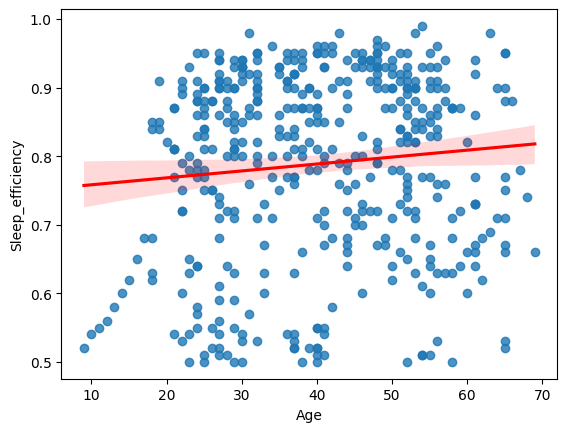

In [ ]:
sns.regplot(data=df, x='Age', y='Sleep_efficiency',line_kws={"color":"red"})

Nous voyons un nuage de points très dispersé, et par ailleurs le coefficient de corrélation est très faible, donc il n'y a pas de lien entre l'âge et la qualité du sommeil.

Après exploration de cette variable et discussion quant à son application en terme "métier", il nous a paru judicieux de transformer cette variable continue en variable catégorielle à 2 modalités (jeunes - seniors). En effet, cela se justifie à la fois d'un point de vue biologique et du point de vue de nos données : la qualité du sommeil diminue avec l'âge ; par ailleurs, nous avons une médiane et une moyenne situées aux alentours de 40 ans, ce qui correspond à un âge à partir duquel le sommeil se désynchronise. Nous allons donc séparer notre échantillon en 2 avec un seuil de 40 ans.

In [ ]:
seuil_age = 40
df['Age_category'] = pd.cut(df['Age'], bins=[9, seuil_age, 69], labels=['Jeune', 'Senior'])
df.head(2)

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency,Age_category
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Senior
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Senior


<Axes: >

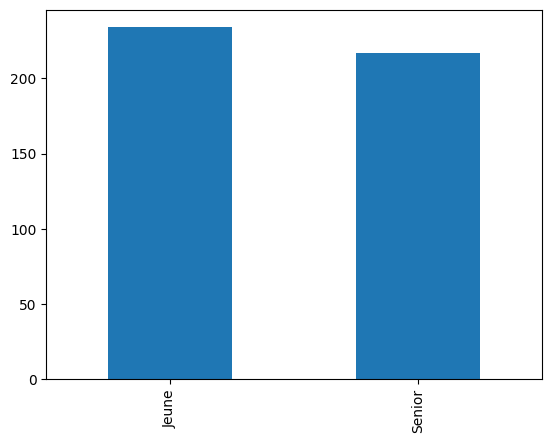

In [ ]:
df['Age_category'].value_counts().plot(kind="bar")

Vérifions maintenant avec un test de Student si le groupe d'âge influence la qualité du sommeil.

<Axes: xlabel='Age_category', ylabel='Sleep_efficiency'>

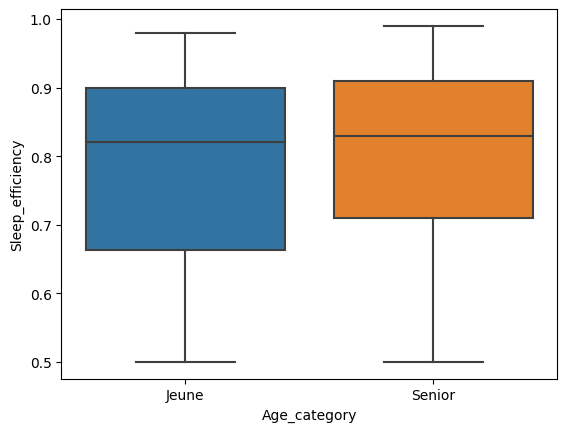

In [ ]:
sns.boxplot(x="Age_category", y="Sleep_efficiency", data=df) 

In [ ]:
df_dropna = df.dropna()
df_age_cat_one_hot=df_dropna
df_age_cat_one_hot["Age_category"]=df_age_cat_one_hot["Age_category"].replace("Senior",1)
df_age_cat_one_hot["Age_category"]=df_age_cat_one_hot["Age_category"].replace("Jeune",1)
df_age_cat_one_hot

<ipython-input-21-4f52145d1f72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_cat_one_hot["Age_category"]=df_age_cat_one_hot["Age_category"].replace("Senior",1)
<ipython-input-21-4f52145d1f72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_cat_one_hot["Age_category"]=df_age_cat_one_hot["Age_category"].replace("Jeune",1)


,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency,Age_category
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,1
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,1
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0,1
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,1
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,1
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,1


In [ ]:
statistique, p_value = stats.ttest_ind(df_age_cat_one_hot["Age_category"], df_age_cat_one_hot["Sleep_efficiency"])
print("Statistique du test t :", statistique)
print("Valeur de p :", p_value)

Statistique du test t : 30.566469843324803
Valeur de p : 4.3084105639132375e-135


<ipython-input-22-fb6ebddde3c0>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statistique, p_value = stats.ttest_ind(df_age_cat_one_hot["Age_category"], df_age_cat_one_hot["Sleep_efficiency"])


Bien que la différence de médiane paraisse légère, le test est significatif, suggérant un impact de la catégorie d'âge, dans le sens d'une meilleure qualité de sommeil pour les personnes senior.

## Qu'en est-il du genre ?

Réalisons la même analyse univariée que pour l'âge. Le genre étant un type de donnée 'object', transformons-le en facteur (category) pour pouvoir le manipuler statistiquement.

In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Gender
Non-Null Count  Dtype   
--------------  -----   
452 non-null    category
dtypes: category(1)
memory usage: 704.0 bytes


<Axes: >

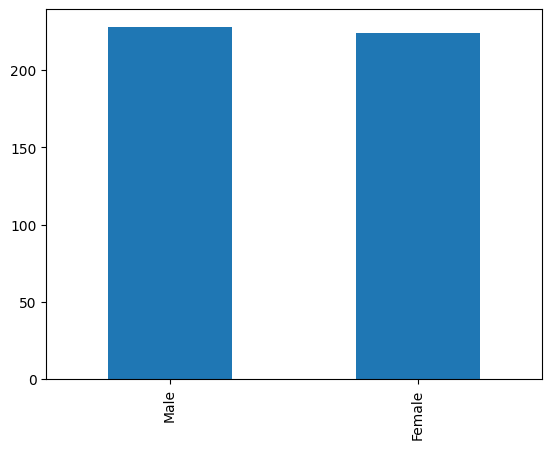

In [ ]:
df['Gender'].value_counts().plot(kind="bar")

Nous observons un échantillon bien réparti quant au genre. Vérifions-le avec un test d'indépendance du Chi2.

In [ ]:
chi2, p, dof, expected = chi2_contingency(df['Gender'].value_counts())
print("Statistique de test :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)

Statistique de test : 0.0
p-value : 1.0
Degrés de liberté : 0
Fréquences attendues : [228. 224.]


La statistique X2 est dans la zone d'indépendance car très faible, et la p-value est >.01, par conséquent nous rejetons H0, les proportions hommes-femmes sont statistiquement égales.

## Existe-t-il un effet du genre sur la qualité du sommeil ?

<Axes: xlabel='Gender', ylabel='Sleep_efficiency'>

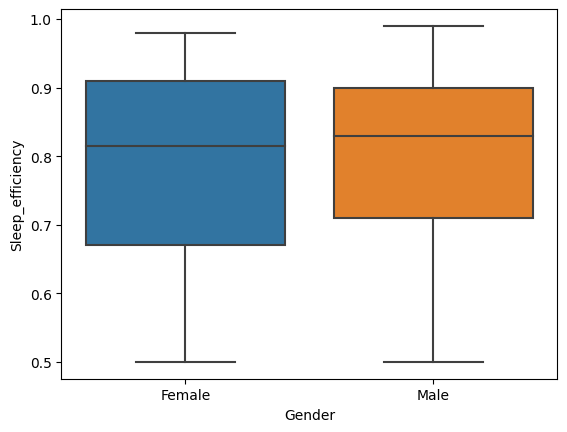

In [ ]:
sns.boxplot(x="Gender", y="Sleep_efficiency", data=df) 

## Les hommes et les femmes sont-ils répartis uniformément quant à leur âge ?

Il semble exister une différence entre la proportion d'hommes et de femmes selon l'âge.

In [ ]:
# création d'un tableau de contingence pour étudier l'indépendance des variables : test du chi 2
tableau_contingence_age_gender = pd.crosstab(df["Gender"], df["Age_category"])
tableau_contingence_age_gender

Age_category,Jeune,Senior
Gender,,
Female,151,72
Male,83,145


<Axes: xlabel='Gender'>

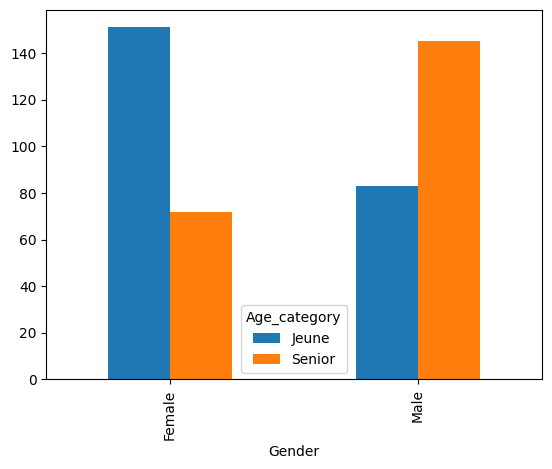

In [ ]:
tableau_contingence_age_gender.plot(kind="bar")

Nous voyons que les hommes et les femmes ne sont pas répartis uniformément quant à l'âge.

In [ ]:
chi2, p, dof, expected = chi2_contingency(tableau_contingence_age_gender.value_counts())
print("Statistique de test :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)

Statistique de test : 0.0
p-value : 1.0
Degrés de liberté : 0
Fréquences attendues : [1. 1.]


La statistique de test n'est pas significative, il existe un biais de sélection ds individus de notre échantillon sur l'âge.

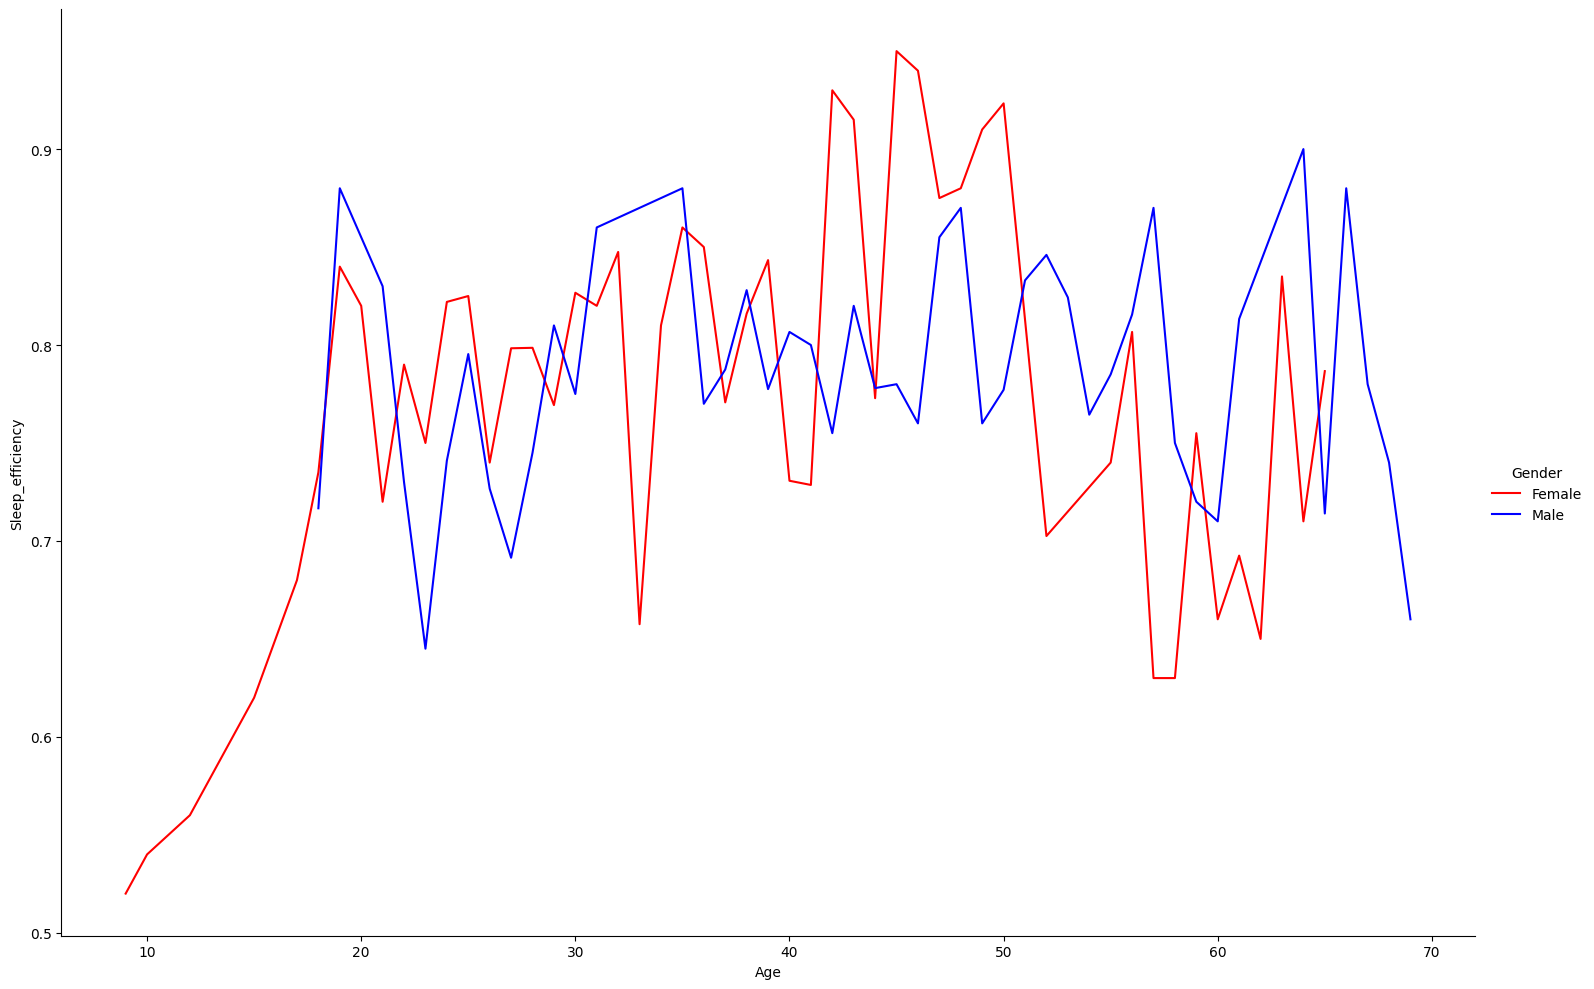

In [ ]:
#sns.set(style="ticks")
# utilisation de sns.relplot
sns.relplot(data=df, kind="line", x="Age", y="Sleep_efficiency", hue="Gender", markers=True,
            errorbar=None, height=10, aspect=1.5, palette=["red", "blue"])
plt.show()

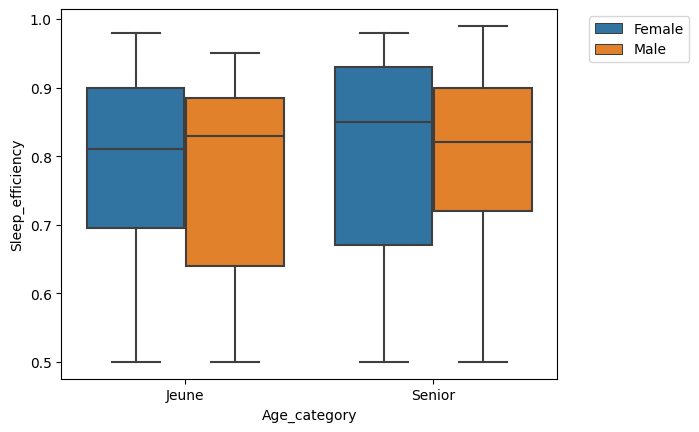

In [ ]:
sns.boxplot(data=df, x="Age_category", y="Sleep_efficiency", hue="Gender")
plt.xlabel("Age_category")
plt.ylabel("Sleep_efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Sélection des colonnes pertinentes dans le DataFrame
columns = ['Age_category', 'Gender', 'Sleep_efficiency']
data = df[columns]

# Création du modèle MANOVA
maov = MANOVA.from_formula('Age_category + Gender ~ Sleep_efficiency', data=data)

# Exécution de la MANOVA
results = maov.mv_test()

# Affichage des résultats
print(results)

                               Multivariate linear model
                                                                                        
----------------------------------------------------------------------------------------
       Intercept               Value        Num DF  Den DF         F Value        Pr > F
----------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 3.0000 447.0000 3165265775840435.5000 0.0000
         Pillai's trace              1.0000 3.0000 447.0000 3165265775840435.5000 0.0000
 Hotelling-Lawley trace 21243394468727.7539 3.0000 447.0000 3165265775840435.0000 0.0000
    Roy's greatest root 21243394468727.7539 3.0000 447.0000 3165265775840435.5000 0.0000
----------------------------------------------------------------------------------------
                                                                                        
-----------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Création du modèle ANOVA
model = ols('Sleep_efficiency ~ Age_category + Gender', data=df).fit()

# Réalisation de l'ANOVA
anova_table = sm.stats.anova_lm(model)

# Affichage de la table ANOVA
print(anova_table)

                 df    sum_sq   mean_sq         F    PR(>F)
Age_category    1.0  0.058474  0.058474  3.228760  0.073029
Gender          1.0  0.003943  0.003943  0.217737  0.640997
Residual      448.0  8.113475  0.018110       NaN       NaN


On pourrait penser qu'il existe une interaction entre l'âge et le genre sur la qualité du sommeil, dans le sens d'une meilleure qualité de sommeil pour les hommes jeunes que pour les femmes jeunes, et inversement une moins bonne qualité de sommeil pour les hommes âgés que pour les femmes âgées. Mais statistiquement cela n'est pas significatif, au vu des tests d'ANOVA.

# Effet des variables liées aux habitudes de sommeil (heure du coucher et du lever, nb d'heures de sommeil) sur la qualité du sommeil

## Bedtime

In [ ]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['Bedtime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Bedtime
Non-Null Count  Dtype         
--------------  -----         
452 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 KB


In [ ]:
df['Year_bedtime'] = (df['Bedtime']).dt.year
df['Hour_bedtime'] = (df['Bedtime']).dt.hour

In [ ]:
df['Year_bedtime'] = df['Year_bedtime'].astype('category')
df['Hour_bedtime'] = df['Hour_bedtime'].astype('category')

In [ ]:
# récupération des données par année
df['Year_bedtime'].value_counts()

2021    452
Name: Year_bedtime, dtype: int64

Toutes les données datent de 2021. Nous gardons donc uniquement les heures.

In [ ]:
df['Hour_bedtime'] = df['Bedtime'].dt.strftime('%H:%M')
df['Hour_bedtime'].value_counts()

00:00    75
22:00    56
23:00    55
21:00    38
01:00    35
21:30    35
00:30    35
02:00    32
02:30    32
01:30    32
22:30    27
Name: Hour_bedtime, dtype: int64

<Axes: >

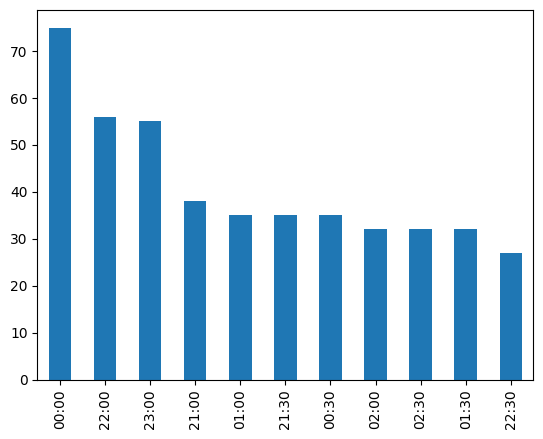

In [ ]:
df['Hour_bedtime'].value_counts().plot(kind='bar')

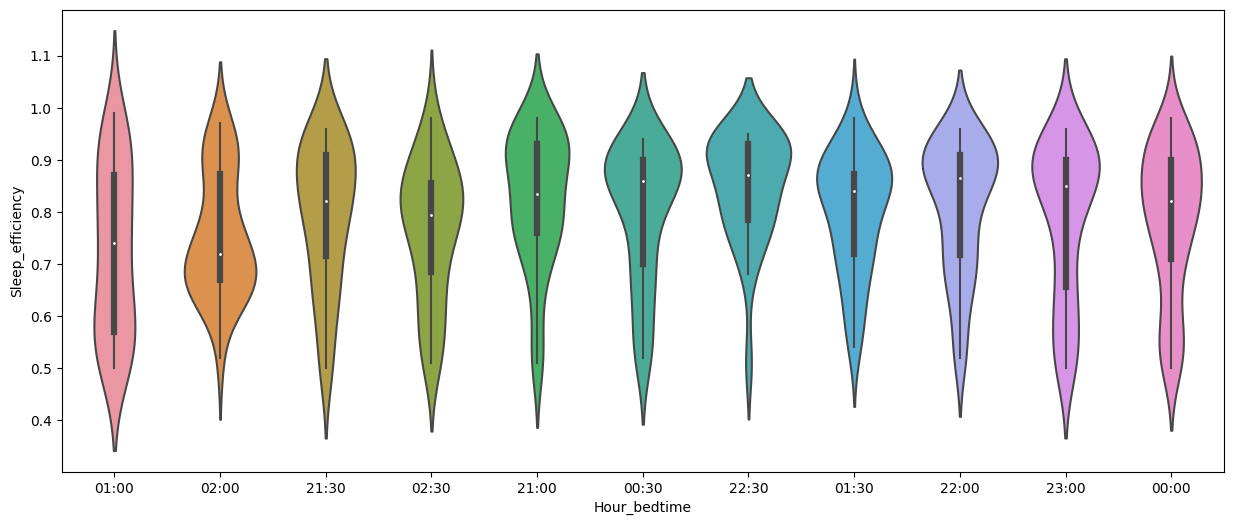

In [ ]:
# ----- variable quantitative + category
plt.figure(figsize=(15,6))
sns.violinplot(x="Hour_bedtime", y="Sleep_efficiency", data=df)
plt.show()

In [ ]:
model = ols("Sleep_efficiency ~ Hour_bedtime", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Hour_bedtime,0.384435,10.0,2.155863,0.019494
Residual,7.863934,441.0,NaN,NaN


Pas de différence significative entre les individus selon l'heure du coucher.

## Wakeup time

In [ ]:
df['Wakeup_time'] = pd.to_datetime(df['Wakeup_time'], errors='coerce')
df['Wakeup_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Wakeup_time
Non-Null Count  Dtype         
--------------  -----         
452 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 KB


In [ ]:
df['Year_wakeup_time'] = (df['Wakeup_time']).dt.year
df['Hour_wakeup_time'] = (df['Wakeup_time']).dt.hour

In [ ]:
df['Year_wakeup_time'] = df['Year_wakeup_time'].astype('category')
df['Hour_wakeup_time'] = df['Hour_wakeup_time'].astype('category')

In [ ]:
# récupération des données par année
df['Year_wakeup_time'].value_counts()

2021    452
Name: Year_wakeup_time, dtype: int64

In [ ]:
df['Hour_wakeup_time'] = df['Wakeup_time'].dt.strftime('%H:%M')
df['Hour_wakeup_time'].value_counts()

09:00    49
07:00    46
05:00    46
08:00    35
06:00    35
05:30    34
07:30    32
06:30    29
10:00    27
09:30    25
08:30    25
04:30    24
04:00    19
10:30     8
03:00     7
11:00     4
03:30     3
11:30     2
12:30     2
Name: Hour_wakeup_time, dtype: int64

<Axes: >

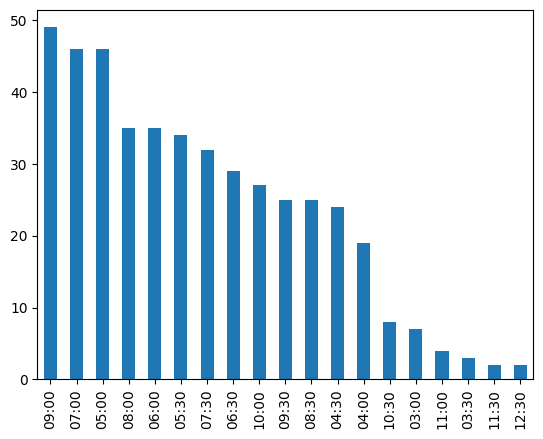

In [ ]:
df['Hour_wakeup_time'].value_counts().plot(kind='bar')

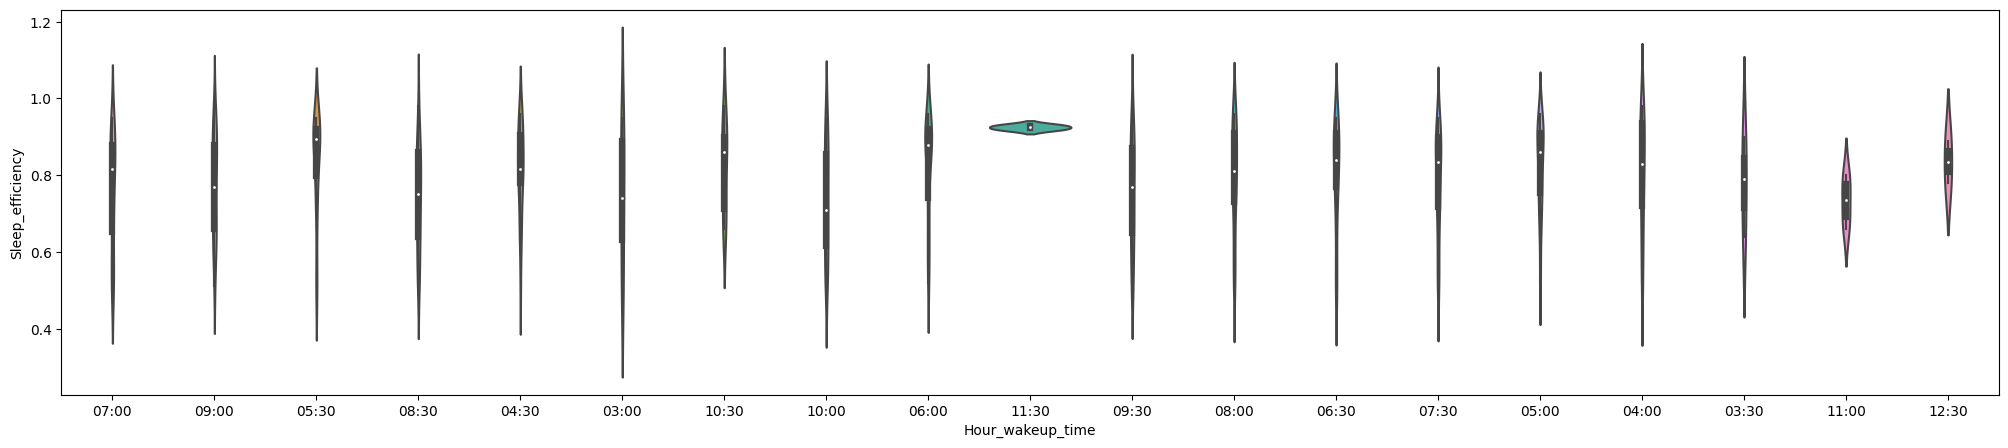

In [ ]:
# ----- variable quantitative + category
plt.figure(figsize=(25,5))
sns.violinplot(x="Hour_wakeup_time", y="Sleep_efficiency", data=df)
plt.show()

In [ ]:
model = ols("Sleep_efficiency ~ Hour_wakeup_time", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Hour_wakeup_time,0.467284,18.0,1.444627,0.106457
Residual,7.781085,433.0,NaN,NaN


Pas d'effet de l'heure du lever sur la qualité du sommeil.

## Sleep duration

In [ ]:
df['Sleep_duration'].describe().round(4)

count    452.0000
mean       7.4657
std        0.8666
min        5.0000
25%        7.0000
50%        7.5000
75%        8.0000
max       10.0000
Name: Sleep_duration, dtype: float64

In [ ]:
# vérification des NaN
df['Sleep_duration'].isna().sum() 

0

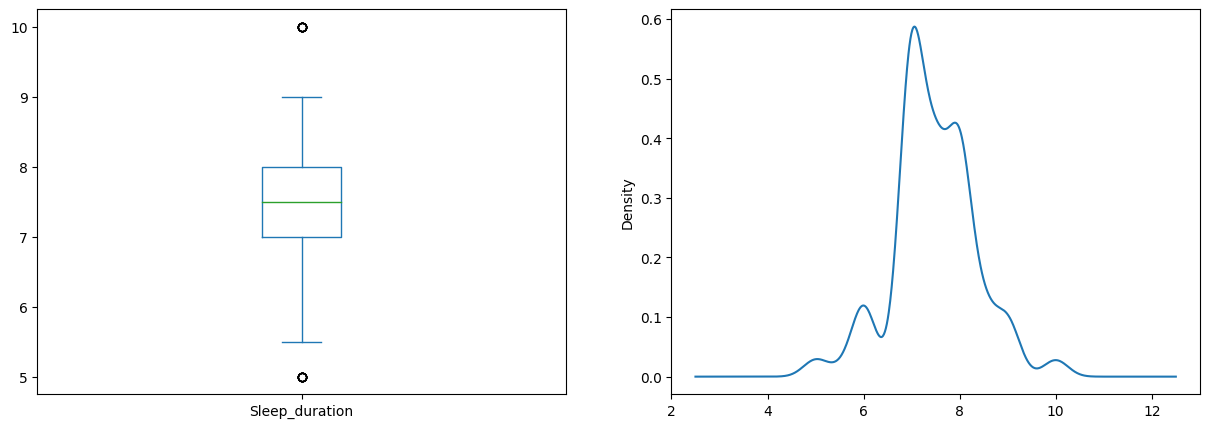

In [ ]:
# visualisons la distribution sur un boxplot et un density plot (avec plt)
plt.figure(figsize=(15, 5))
plt.subplot(121)
df['Sleep_duration'].plot(kind="box") # sns.boxplot(df['Sleep efficiency'])
plt.subplot(122)
df['Sleep_duration'].plot(kind="density") # sns.kdeplot(df['Sleep efficiency'])
plt.show()

Sur le boxplot, on voit que certains individus sont considérés comme des outliers au vu de la distribution : ceux qui dorment 5h et ceux qui dorment 10h. Cela ne nous paraît toutefois pas constituer des valeurs aberrantes au sens physiologique du terme donc nous les conservons pour le moment.

In [ ]:
# coefficient de variation
sd_sleep_efficiency = np.std(df['Sleep_duration'], ddof=1) # écart-type non biaisé puisque nous le calculons sur l'échantillon
coef_variation_sleep_efficiency = sd_sleep_efficiency / df['Sleep_duration'].mean() * 100
coef_variation_sleep_efficiency

11.60807413570263

Le CV est < 50% donc l'échantillon est homogène sur cette variable.

In [ ]:
# skewness pour l'asymétrie
df['Sleep_duration'].skew()

0.018783220040188328

In [ ]:
# kurtosis pour l'aplatissement
df['Sleep_duration'].kurtosis()

1.0399337075480761

In [ ]:
# vérifions avec le test de Shapiro-Wilk si cette variable suit une loi normale 
stat, p = shapiro(df['Sleep_duration'])
print(stat, p)

0.9299443364143372 1.0385026443394257e-13


Existe-t-il un effet de la durée de sommeil sur la qualité du sommeil ?

In [ ]:
correlation_matrix_duration = df[['Sleep_duration',
                                  'Sleep_efficiency']].corr()
correlation_matrix_duration

,Sleep_duration,Sleep_efficiency
Sleep_duration,1.000000,-0.027467
Sleep_efficiency,-0.027467,1.000000


Il n'y a pas de relation de corrélation forte entre les 2 variables.

# Effet des variables physiologiques (REM/Deep/Light sleep, awakenings) sur la qualité du sommeil

## **Analyse univariée**

### Sleep efficiency

Sleep efficiency est une mesure de la qualité du sommeil exprimée sous forme de coefficient (théoriquement allant de 0 à 1). Il s'agit de notre target.

In [ ]:
df['Sleep_efficiency'].describe().round(4)

count    452.0000
mean       0.7889
std        0.1352
min        0.5000
25%        0.6975
50%        0.8200
75%        0.9000
max        0.9900
Name: Sleep_efficiency, dtype: float64

La distribution de l'échantillon s'étale de 0.5 (min) à 0.99 (max)</br>
Moyenne 0.79, écart-type 0.13</br>
Médiane 0.82</br>
50% des sujets (intervalle inter-quartiles) ont une qualité de sommeil entre 0.7 et 0.9

In [ ]:
# coefficient de variation
sd_sleep_efficiency = np.std(df['Sleep_efficiency'], ddof=1) # écart-type non biaisé puisque nous le calculons sur l'échantillon
coef_variation_sleep_efficiency = sd_sleep_efficiency / df['Sleep_efficiency'].mean() * 100
coef_variation_sleep_efficiency

17.14214007292208

Le CV est faible et < 50% ce qui reflète une homogénéité de notre échantillon sur cette variable.

In [ ]:
# vérification des NaN
df['Sleep_efficiency'].isna().sum() 

0

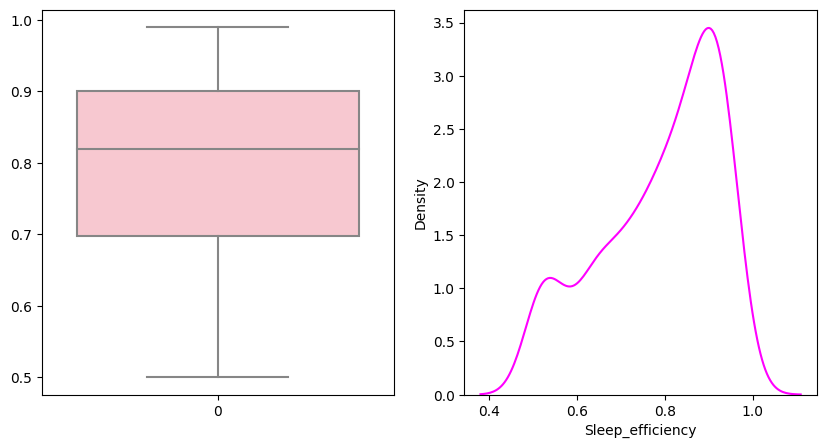

In [ ]:
# visualisons la distribution sur un boxplot et un density plot (avec plt)
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(df['Sleep_efficiency'], color='pink')
plt.subplot(122)
sns.kdeplot(df['Sleep_efficiency'], color='fuchsia')
plt.show()

Sur le boxplot : pas d'outlier</br>
Sur la courbe de densité : forme asymétrique (majorité des données à droite de la moyenne), vérifions cela avec les paramètres de forme.

In [ ]:
# skewness pour l'asymétrie
df['Sleep_efficiency'].skew()

-0.65027356933683

Skewness < 0 :</br>
La densité est inégalement répartie autour de la moyenne, la courbe est effectivement skewed à gauche (la majorité des données à droite de la moy).</br>
Cela signifie que la majorité de la population présente une qualité de sommeil plutôt bonne

In [ ]:
# kurtosis pour l'aplatissement
df['Sleep_efficiency'].kurtosis()

-0.7196114919033132

Kurtosis < 3 :</br>
La courbe est plus aplatie que la courbe de Gauss, càd que l'échantillon s'étale davantage autour de la moy.

In [ ]:
# vérifions avec le test de Shapiro-Wilk si cette variable suit une loi normale 
stat, p = shapiro(df['Sleep_efficiency'])
print(stat, p)

0.9170171618461609 4.632357119963883e-15


La statistique de test W est signiticative (p<.01) donc on rejette H0, la variable n'est pas distribuée normalement, et nous pouvons affirmer cela avec un degré très faible de nous tromper.</br>
Cela signifie que d'autres facteurs que le hasard, interviennent dans la qualité du sommeil de nos sujets, et nous allons vérifier lesquels sont déterminants.

### REM sleep percentage

Le REM-sleep ou sommeil paradoxal est la phase du sommeil du rêve, caractérisée par une forte activité cérébrale et des ondes rapides avec des mouvements oculaires rapides (d'où le nom Rapid Eyes Movements (REM)), et une complète atonique musculaire.</br>
Le REM-sleep est une phase de consolidation des souvenirs en mémoire à long terme et est donc responsable de la digestion des événements de vie et des émotions.</br>
La part de REM-sleep augmente en cours de nuit, pour atteindre son max en fin de nuit.</br>
Ici il est mesuré en % càd la proportion de REM-sleep pendant une nuit d'un sujet (relativement aux autres stades de sommeil).</br>
Pour un sujet moyen la phase de REM-sleep représente en moyenne 20% du temps de sommeil.</br>
Nous avons vérifié et chaque stade de sommeil additionné pour chaque sujet = 100%.

In [ ]:
df['REM_sleep_percentage'].describe().round(4)

count    452.000
mean      22.615
std        3.526
min       15.000
25%       20.000
50%       22.000
75%       25.000
max       30.000
Name: REM_sleep_percentage, dtype: float64

La distribution de l'échantillon s'étale de 15% (min) 30% (max).</br>
Moyenne 22.61, écart-type 3.52%</br>
Médiane 22%</br>
50% des sujets (intervalle inter-quartiles) ont une proportion de REM-sleep entre 20 et 25% par nuit

In [ ]:
# coefficient de variation
sd_rem_sleep = np.std(df['REM_sleep_percentage'], ddof=1) # écart-type non biaisé puisque nous le calculons sur l'échantillon
coef_variation_rem_sleep = sd_rem_sleep / df['REM_sleep_percentage'].mean() * 100
coef_variation_rem_sleep

15.591225422714535

Le CV est faible et < 50% ce qui reflète une homogénéité de notre échantillon sur cette variable

In [ ]:
# vérification des NaN
df['REM_sleep_percentage'].isna().sum() 

0

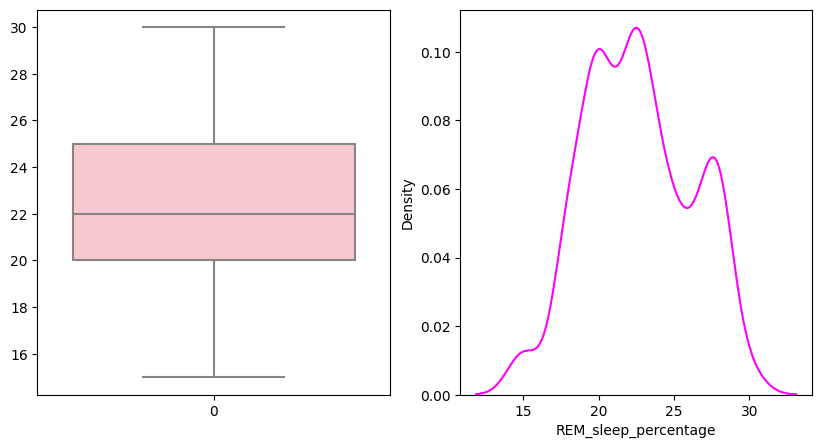

In [ ]:
# visualisons la distribution sur un boxplot et un density plot
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(df['REM_sleep_percentage'], color='pink')
plt.subplot(122)
sns.kdeplot(df['REM_sleep_percentage'], color='fuchsia')
plt.show()

Sur le boxplot : pas d'outlier</br>
Sur la courbe de densité : forme asymétrique (majorité des données à gauche de la moyenne), vérifions cela avec les paramètres de forme.

In [ ]:
# skewness pour l'asymétrie
df['REM_sleep_percentage'].skew()

0.0952689711284196

Skewness > 0 :</br>
La densité est inégalement répartie autour de la moyenne, la courbe est effectivement skewed à droite (la moajorité des données à gauche de la moy).
Cela signifie que la majorité de la population présente une proportion de REM-sleep en-deçà de la moy

In [ ]:
# kurtosis pour l'aplatissement
df['REM_sleep_percentage'].kurtosis()

-0.7317655766132396

Kurtosis < 3 :</br>
La courbe est plus aplatie que la courbe de Gauss, càd que l'échantillon s'étale davantage autour de la moy (mais cela paraît bizarre car la courbe a l'air pointue visuellement).

In [ ]:
# vérifions avec le test de Shapiro-Wilk si cette variable suit une loi normale 
stat, p = shapiro(df['REM_sleep_percentage'])
print(stat, p)

0.9548217058181763 1.5464195202152808e-10


La statistique de test W est signiticative (p<.01) donc on rejette H0, la variable n'est pas distribuée normalement, et nous pouvons affirmer cela avec un degré très faible de nous tromper.</br>
Cela signifie que d'autres facteurs que le hasard, interviennent dans l'apparition et la durée du REM-sleep (ce sont des facteurs physiologiques, sociaux, hygiène de vie qui le déterminent).

### Deep sleep percentage

Le sommeil lent profond est un stade pendant lequel il est difficile de réveiller le dormeur. Le stade est caractérisé par une régénération des cellules et du corps, les ondes cérébrales sont lentes. La mesure est la même que pour le REM-sleep (% de temps par rapport aux autres stades). Un sujet moyen passe 25% de son temps de sommeil en sommeil lent profond.

In [ ]:
df['Deep_sleep_percentage'].describe().round(4)

count    452.0000
mean      52.8230
std       15.6542
min       18.0000
25%       48.2500
50%       58.0000
75%       63.0000
max       75.0000
Name: Deep_sleep_percentage, dtype: float64

La moyenne et la médiane semblent élevées.

In [ ]:
# coefficient de variation
sd_deep_sleep = np.std(df['Deep_sleep_percentage'], ddof=1) # écart-type non biaisé puisque nous le calculons sur l'échantillon
coef_variation_deep_sleep = sd_deep_sleep / df['Deep_sleep_percentage'].mean() * 100
coef_variation_deep_sleep

29.63525843050062

Le CV est < 50% ce qui reflète une homogénéité de notre échantillon sur cette variable.

In [ ]:
# vérification des NaN
df['Deep_sleep_percentage'].isna().sum() 

0

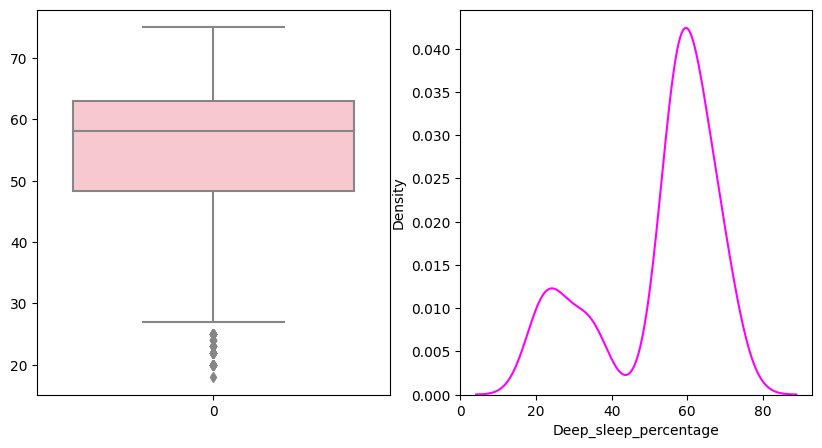

In [ ]:
# visualisons la distribution sur un boxplot et un density plot
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(df['Deep_sleep_percentage'], color='pink')
plt.subplot(122)
sns.kdeplot(df['Deep_sleep_percentage'], color='fuchsia')
plt.show()

Sur le boxplot : il y a des outliers qui ont un % bas de deep sleep.</br>
Sur la courbe de densité : forme bimodale.

In [ ]:
# skewness pour l'asymétrie
df['Deep_sleep_percentage'].skew()

-0.9729432448622021

Skewness < 0 :</br>
La densité est inégalement répartie autour de la moyenne, il y a plus de données à droite de la moy.

In [ ]:
# kurtosis pour l'aplatissement
df['Deep_sleep_percentage'].kurtosis()

-0.43586105709704803

Kurtosis < 3 : courbe plus aplatie

In [ ]:
# vérifions avec le test de Shapiro-Wilk si cette variable suit une loi normale 
stat, p = shapiro(df['Deep_sleep_percentage'])
print(stat, p)

0.8283051252365112 1.1687266378710839e-21


Même conclusion que pour le REM-sleep

### Light sleep percentage

Il s'agit d'un stade de sommeil lent léger, pendant lequel le dormeur entre progressivement dans le sommeil profond, il peut être réveillé plus facilement.
Physiologiquement, les ondes cérébrales sont plus rapides.
En moyenne cela représente environ la moitié du temps de sommeil généralement.
Il s'agit de la même mesure que pour les 2 précédantes variables.

In [ ]:
df['Light_sleep_percentage'].describe().round(4)

count    452.0000
mean      24.5619
std       15.3137
min        7.0000
25%       15.0000
50%       18.0000
75%       32.5000
max       63.0000
Name: Light_sleep_percentage, dtype: float64

Ici la moyenne et la médiane me semblent anormalement basses.

In [ ]:
# coefficient de variation
sd_light_sleep = np.std(df['Light_sleep_percentage'], ddof=1) # écart-type non biaisé puisque nous le calculons sur l'échantillon
coef_variation_light_sleep = sd_light_sleep / df['Light_sleep_percentage'].mean() * 100
coef_variation_light_sleep

62.34711564292266

Le CV est > 50% ce qui reflète une hétérogénéité de notre échantillon sur cette variable.

In [ ]:
# vérification des NaN
df['Light_sleep_percentage'].isna().sum() 

0

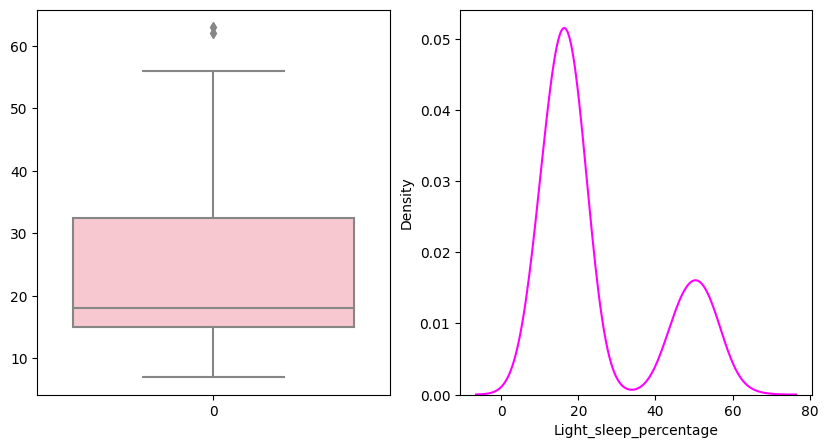

In [ ]:
# visualisons la distribution sur un boxplot et un density plot
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(df['Light_sleep_percentage'], color='pink')
plt.subplot(122)
sns.kdeplot(df['Light_sleep_percentage'], color='fuchsia')
plt.show()

Sur le boxplot : il y a des outliers qui ont un % + élevé de light sleep.</br>
Sur la courbe de densité : forme bimodale.

In [ ]:
# skewness pour l'asymétrie
df['Light_sleep_percentage'].skew()

1.0802756293826

Skewness > 0 : la densité est inégalement répartie autour de la moyenne, il y a plus de données à gauche de la moy.

In [ ]:
# kurtosis pour l'aplatissement
df['Light_sleep_percentage'].kurtosis()

-0.5286409478943228

Kurtosis < 3 : courbe plus aplatie.

In [ ]:
# vérifions avec le test de Shapiro-Wilk si cette variable suit une loi normale 
stat, p = shapiro(df['Light_sleep_percentage'])
print(stat, p)

0.7498626708984375 1.3883584618530814e-25


Idem

### Awakenings

Il s'agit du nb de réveils nocturnes (on ne sait pas si ce sont des réveils conscients ou des micro réveils), exprimés en unités mais type de données float. Il serait judicieux de transformer la variable en category, car les individus présentent soit 0, 1, 2, 3 ou 4 réveils nocturnes.

In [ ]:
# vérification des NaN
df['Awakenings'].isna().sum() 

20

Comme il s'agit d'une très faible proportion de NaN (<0.05% de notre dataset), nous les maintenons pour le moment.

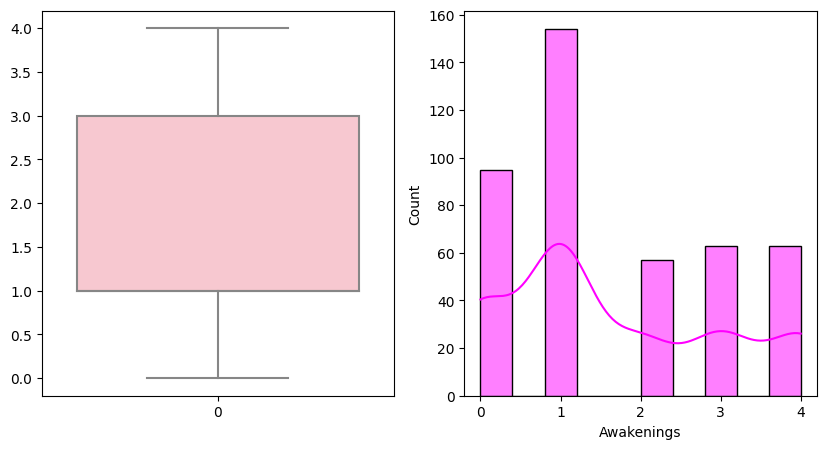

In [ ]:
# visualisons la distribution sur un boxplot et un density plot
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(df['Awakenings'], color='pink')
plt.subplot(122)
sns.histplot(df['Awakenings'], color='fuchsia', kde=True)
plt.show()

Nous voyons sur ces représentations que la variable Awakenings est constituée de valeurs discrètes, qui représentent les nombres de réveils nocturnes (0, 1, 2, 3, 4, 5), nous voyons cela par les barres de l'histogramme. Afin de pourvoir manipuler cette variable, nous la transformons en catégorie. Le mode est 1.

In [ ]:
# transformation en catégorie
df['Awakenings'] = df['Awakenings'].astype('category')
df['Awakenings'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Awakenings
Non-Null Count  Dtype   
--------------  -----   
432 non-null    category
dtypes: category(1)
memory usage: 792.0 bytes


In [ ]:
# visualisation sur un barchart
value_counts = df['Awakenings'].value_counts()
labels = value_counts.index.tolist()
counts = value_counts.values.tolist()

awakenings_plot = go.Figure(data=[go.Bar(x=labels, y=counts, marker=dict(color='pink'))])

awakenings_plot.update_layout(
    title='Nombre de réveils nocturnes',
    xaxis=dict(title='Awakenings'),
    yaxis=dict(title='Count'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    width=800
)
awakenings_plot.show()

La plupart des individus se réveillent une fois par nuit.

### Répartition des stades de sommeil

In [ ]:
df[['REM_sleep_percentage',
    'Deep_sleep_percentage',
    'Light_sleep_percentage']].head(4)

,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage
0,18,70,12
1,19,28,53
2,20,70,10
3,23,25,52


In [ ]:
# vérification que la somme des % fasse bien 100%
df['REM_sleep_percentage'].mean() + df['Deep_sleep_percentage'].mean() + df['Light_sleep_percentage'].mean()

100.0

In [ ]:
# visualisation sur un pie chart
labels = ['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']
values = [df['REM_sleep_percentage'].mean(), df['Deep_sleep_percentage'].mean(), df['Light_sleep_percentage'].mean()]

pie_pct_sleep = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
pie_pct_sleep.update_layout(height=500, width=800, title_text="Répartition des stades de sommeil sur l'ensemble du dataset", piecolorway=['#b3e2cd', '#fdccac', '#cbd5e8'])
pie_pct_sleep.show()

## **Analyse bivariée var. sleep efficiency, REM sleep, deep sleep, light sleep, awakenings**

In [ ]:
# ----- variables quantitatives -----
correlation_matrix_sleep = df[[
                         'Sleep_efficiency',
                         'REM_sleep_percentage',
                         'Deep_sleep_percentage',
                         'Light_sleep_percentage'
                         ]].corr()
correlation_matrix_sleep

,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage
Sleep_efficiency,1.000000,0.062362,0.787335,-0.819204
REM_sleep_percentage,0.062362,1.000000,-0.208159,-0.017462
Deep_sleep_percentage,0.787335,-0.208159,1.000000,-0.974311
Light_sleep_percentage,-0.819204,-0.017462,-0.974311,1.000000


<Axes: >

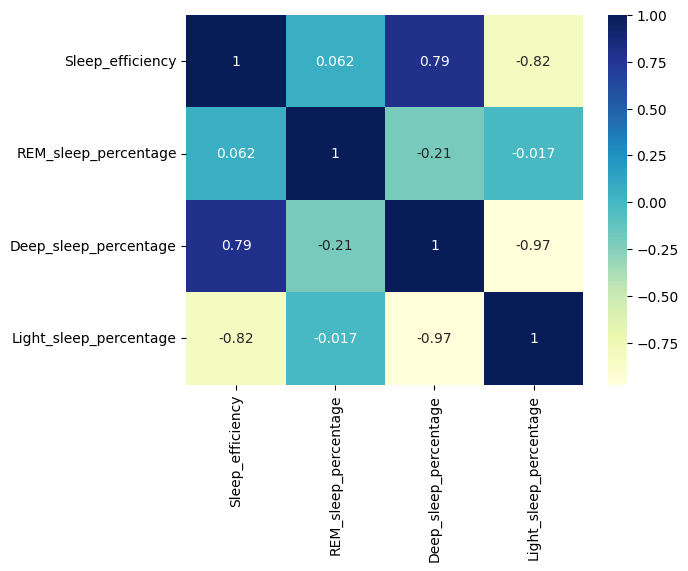

In [ ]:
sns.heatmap(correlation_matrix_sleep, annot=True, cmap='YlGnBu')

In [ ]:
# test de significativité pour les corrélations les plus importantes
# deep sleep et sleep efficiency
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['Deep_sleep_percentage'], df['Sleep_efficiency'])
print("p-value:", p_value)

p-value: 1.4330145730238673e-96


In [ ]:
# light sleep et sleep efficiency
correlation, p_value = pearsonr(df['Light_sleep_percentage'], df['Sleep_efficiency'])
print("p-value:", p_value)

p-value: 1.0046471596591084e-110


In [ ]:
# light sleep et deep sleep
correlation, p_value = pearsonr(df['Light_sleep_percentage'], df['Deep_sleep_percentage'])
print("p-value:", p_value)

p-value: 1.7667379858881317e-293


Sleep efficiency est corrélée positivement (r=0.79, p<.01) avec Deep sleep percentage, ce qui signifie que plus la proportion de sommeil profond augmente, meilleure est la qualité de sommeil. A l'inverse, il existe une corrélation négative (r=-0.82, p<.01) entre sleep efficiency et Light sleep percentage, ce qui signifie que plus la proportion de sommeil par nuit est grande, moindre est la qualité du sommeil. Ce qui est cohérent avec le résultat précédent. Il s'agit d'une interaction croisée. Par ailleurs, cela se voit sur la corrélation négative qui existe entre deep et light sleep percentage (r=-0.97, p<.01), plus l'un augmente, plus l'autre diminue. Visualisons ces relations sur un graphique de régression.

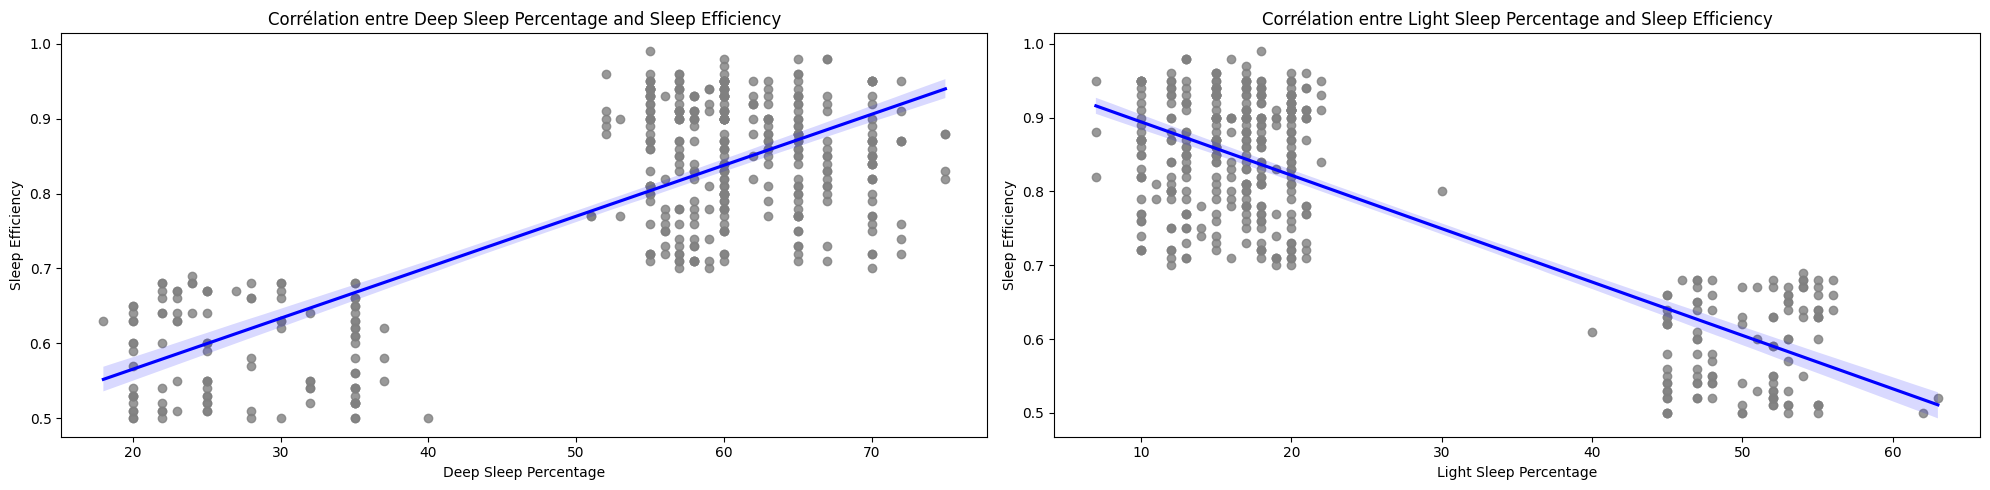

In [ ]:
# visualisation sur un graphique de régression
plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.regplot(data=df, x='Deep_sleep_percentage', y='Sleep_efficiency', scatter_kws={'color': 'grey'}, line_kws={'color': 'blue'})
plt.xlabel('Deep Sleep Percentage')
plt.ylabel('Sleep Efficiency')
plt.title('Corrélation entre Deep Sleep Percentage and Sleep Efficiency')

plt.subplot(122)
sns.regplot(data=df, x='Light_sleep_percentage', y='Sleep_efficiency', scatter_kws={'color': 'grey'}, line_kws={'color': 'blue'})
plt.xlabel('Light Sleep Percentage')
plt.ylabel('Sleep Efficiency')
plt.title('Corrélation entre Light Sleep Percentage and Sleep Efficiency')

plt.tight_layout()
plt.show()

Cette visualisation n'est pas optimale dans le sens où les nuages de points sont assez chaotiques, mais nous percevons clairement l'allure bi-modale, ce qui nous suggère de réaliser une segmentation des données de la variable 'Deep sleep efficiency', sur la base d'un modèle de clustering k-means, puis de réaliser des analyses pour chaque cluster.

### Segmentation des données de la variable Deep Sleep Percentage

In [ ]:
from sklearn.cluster import KMeans

data_means_deep = pd.DataFrame(df['Deep_sleep_percentage'])

# K-means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_means_deep)

# étiquettes de cluster pour chaque donnée
labels = kmeans.labels_
df['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans_plot = px.scatter(df, x='Deep_sleep_percentage', y='Sleep_efficiency', color='Cluster',
                 title='Clustering K-means', labels={'Deep_sleep_percentage': 'Deep Sleep Percentage', 'Sleep_efficiency': 'Sleep Efficiency'})
kmeans_plot.update_layout(template='plotly_white', plot_bgcolor='rgba(0,0,0,0)', width=1000)
kmeans_plot.show()

In [ ]:
# calcul de la moyenne pour chaque cluster
cluster_means = df.groupby('Cluster')[['Deep_sleep_percentage', 'Sleep_efficiency']].mean()
cluster_means

,Deep_sleep_percentage,Sleep_efficiency
Cluster,,
0,61.292035,0.854926
1,27.415929,0.590885


In [ ]:
kmeans_means = make_subplots(rows=1, cols=2, subplot_titles=('Deep Sleep Percentage', 'Sleep Efficiency'))
cluster_names = cluster_means.index.tolist() # pour avoir le nom des clusters
deep_sleep_means = cluster_means['Deep_sleep_percentage']
sleep_efficiency_means = cluster_means['Sleep_efficiency']

kmeans_means.add_trace(go.Bar(x=cluster_names, y=deep_sleep_means, text=deep_sleep_means, textposition='auto', showlegend=False, marker=dict(color='pink')), row=1, col=1)
kmeans_means.update_xaxes(title_text='Cluster', row=1, col=1)
kmeans_means.update_yaxes(title_text='Moyenne Deep Sleep Percentage', row=1, col=1)

kmeans_means.add_trace(go.Bar(x=cluster_names, y=sleep_efficiency_means, text=sleep_efficiency_means, textposition='auto', showlegend=False, marker=dict(color='purple')), row=1, col=2)
kmeans_means.update_xaxes(title_text='Cluster', row=1, col=2)
kmeans_means.update_yaxes(title_text='Moyenne Sleep Efficiency', row=1, col=2)
kmeans_means.update_layout(height=400, width=1200, title_text='Comparaison des moyennes par cluster', plot_bgcolor='rgba(0,0,0,0)')
kmeans_means.show()

In [ ]:
# test d'indépendance t de Student (1 VI qualitative + 1 VD quantitative)

from scipy.stats import ttest_ind

cluster_0 = df[df['Cluster'] == 0]['Sleep_efficiency']
cluster_1 = df[df['Cluster'] == 1]['Sleep_efficiency']

# Effectuer le test t de Student
t_stat, p_value = ttest_ind(cluster_0, cluster_1)

# Afficher les résultats
print("Test t de Student:")
print("T-statistique:", t_stat)
print("Valeur p:", p_value)

Test t de Student:
T-statistique: 33.71009873194819
Valeur p: 3.379981536625091e-125


La statistique de test t étant relativement élevée et la p-value <.01, le test est significatif, suggérant que l'appartenance au cluster (1 ou 0) détermine la qualité du sommeil : les individus du cluster 0 ayant la plus grande proportion de sommeil profond présentent une meilleure qualité de sommeil, et inversement pour les individus du cluster 1.

### Segmentation des données de la variable Light Sleep Percentage

Cette variable est corrélée négativement par rapport à Deep sleep percentage, c'est-à-dire que plus le sommeil d'un individu est composé de sommeil profond, moins il est composé de sommeil léger. Par conséquent ces 2 variables présentent un profil inversé. Bien que nous nous attendons au résultat de la manipulation de cette variable, nous allons effectuer la même manipulation que pous la précédente, à savoir un clustering k-means.

In [ ]:
data_means_light = pd.DataFrame(df['Light_sleep_percentage'])

# K-means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_means_light)

# étiquettes de cluster pour chaque donnée
labels = kmeans.labels_
df['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans_plot = px.scatter(df, x='Light_sleep_percentage', y='Sleep_efficiency', color='Cluster',
                 title='Clustering K-means', labels={'Light_sleep_percentage': 'Light Sleep Percentage', 'Sleep_efficiency': 'Sleep Efficiency'})
kmeans_plot.update_layout(template='plotly_white', plot_bgcolor='rgba(0,0,0,0)', width=1000)
kmeans_plot.show()

In [ ]:
# calcul de la moyenne pour chaque cluster
cluster_means = df.groupby('Cluster')[['Light_sleep_percentage', 'Sleep_efficiency']].mean()
cluster_means

,Light_sleep_percentage,Sleep_efficiency
Cluster,,
0,15.988201,0.854926
1,50.283186,0.590885


In [ ]:
kmeans_means = make_subplots(rows=1, cols=2, subplot_titles=('Light Sleep Percentage', 'Sleep Efficiency'))
cluster_names = cluster_means.index.tolist() # pour avoir le nom des clusters
light_sleep_means = cluster_means['Light_sleep_percentage']
sleep_efficiency_means = cluster_means['Sleep_efficiency']

kmeans_means.add_trace(go.Bar(x=cluster_names, y=light_sleep_means, text=light_sleep_means, textposition='auto', showlegend=False, marker=dict(color='pink')), row=1, col=1)
kmeans_means.update_xaxes(title_text='Cluster', row=1, col=1)
kmeans_means.update_yaxes(title_text='Moyenne Light Sleep Percentage', row=1, col=1)

kmeans_means.add_trace(go.Bar(x=cluster_names, y=sleep_efficiency_means, text=sleep_efficiency_means, textposition='auto', showlegend=False, marker=dict(color='purple')), row=1, col=2)
kmeans_means.update_xaxes(title_text='Cluster', row=1, col=2)
kmeans_means.update_yaxes(title_text='Moyenne Sleep Efficiency', row=1, col=2)
kmeans_means.update_layout(height=400, width=1200, title_text='Comparaison des moyennes par cluster', plot_bgcolor='rgba(0,0,0,0)')
kmeans_means.show()

In [ ]:
# test d'indépendance t de Student (1 VI qualitative à 2 modalités + 1 VD quantitative)
cluster_0 = df[df['Cluster'] == 0]['Sleep_efficiency']
cluster_1 = df[df['Cluster'] == 1]['Sleep_efficiency']

# Effectuer le test t de Student
t_stat, p_value = ttest_ind(cluster_0, cluster_1)

# Afficher les résultats
print("Test t de Student:")
print("T-statistique:", t_stat)
print("Valeur p:", p_value)

Test t de Student:
T-statistique: 33.71009873194819
Valeur p: 3.379981536625091e-125


Nous observons sans surprise le pattern inverse pour le sommeil profond, ce qui est également significatif.

## **Analyse bivariée var. sleep efficiency et Awakenings**

In [ ]:
# ----- variable quantitative + category
violin_plot = px.violin(df, x="Awakenings", y="Sleep_efficiency", box=True, points="all", color="Awakenings",
category_orders={"Awakenings": [0.0, 1.0, 2.0, 3.0, 4.0]},
labels={"Awakenings": "Awakenings", "Sleep_efficiency": "Sleep Efficiency"})
violin_plot.update_layout(title_text='Distributions de la qualité du sommeil pour chaque nombre de réveils', plot_bgcolor='rgba(0,0,0,0)', showlegend=False, width=1500)
violin_plot.show()

La qualité du sommeil semble diminuer à mesure que le nb de réveil augmente. On observe un gap important entre 1 et 2 réveils puis les valeurs médianes semblent stagner. Vérifions cela statistiquement.

In [ ]:
model = ols("Sleep_efficiency ~ Awakenings", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Awakenings,3.142117,4.0,69.834882,1.834836e-45
Residual,4.803057,427.0,NaN,NaN


Il semble exister un effet significatif du nombre de réveils sur la qualité du sommeil. Vérifions dans quel sens avec des tests de Tukey (post hoc) de comparaisons multiples.

In [ ]:
levels = df['Awakenings'].unique()
posthoc = pairwise_tukeyhsd(df['Sleep_efficiency'], df['Awakenings'])
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0913    0.0 -0.1312 -0.0513   True
   0.0    2.0  -0.2188    0.0 -0.2701 -0.1675   True
   0.0    3.0  -0.2206    0.0 -0.2703 -0.1708   True
   0.0    4.0  -0.2053    0.0 -0.2551 -0.1556   True
   0.0    nan  -0.1208 0.0001 -0.1962 -0.0455   True
   1.0    2.0  -0.1275    0.0  -0.175   -0.08   True
   1.0    3.0  -0.1293    0.0 -0.1751 -0.0835   True
   1.0    4.0  -0.1141    0.0 -0.1599 -0.0683   True
   1.0    nan  -0.0295 0.8548 -0.1023  0.0433  False
   2.0    3.0  -0.0018    1.0 -0.0577  0.0542  False
   2.0    4.0   0.0135 0.9831 -0.0425  0.0695  False
   2.0    nan    0.098 0.0062  0.0184  0.1776   True
   3.0    4.0   0.0152 0.9676 -0.0393  0.0698  False
   3.0    nan   0.0998 0.0042  0.0212  0.1784   True
   4.0    nan   0.0845 0.0268  0.0059  0.1631   True
----------------------------------------------

Les individus qui se réveillent 0 ou 1 fois ont une qualité de sommeil significativement supérieure aux 3 autres groupes (en revanche, les groupes 2, 3, 4 ne diffèrent pas significativement entre eux), ce qui confirme les observations.

# Effets des variables exogènes (consommation de caféine, alcool, tabac et exercice physique)

In [ ]:
#Installation des biliothèques
#ce code permet de ne pas réinstaller les bibliothèques déjà installées 

import importlib
import pkg_resources
import subprocess

libraries = ['pandas', 'matplotlib', 'numpy', 'seaborn', 'scipy', 'statsmodels']

for libname in libraries:
    # Vérifier si la bibliothèque est déjà installée
    if libname in [dist.project_name for dist in pkg_resources.working_set]:
        print(f"{libname} est déjà installé.")
    # Si la bibliothèque n'est pas installée, l'installer
    else:
        print(f"{libname} n'est pas installé. Installation en cours...")
        subprocess.call(['pip', 'install', libname])
        print(f"{libname} a été installé avec succès !")

pandas est déjà installé.
matplotlib est déjà installé.
numpy est déjà installé.
seaborn est déjà installé.
scipy est déjà installé.
statsmodels est déjà installé.


In [ ]:
#Importation des biliothèques 

import csv                               #Manipulations de fichiers, de dataframes, et de valeurs mathématiques
import scipy as sp                       
import numpy as np                       
import pandas as pd                      
                                         
import seaborn as sns                    #Pour les représentations graphiques et statistiques
import matplotlib as plt                 
import statsmodels as stm                
import matplotlib.pyplot as plt          
                                         
from scipy.stats import skew             #Pour les tests statistiques 
from scipy.stats import shapiro          
from scipy.stats import kurtosis         
                                         
from sklearn.decomposition import PCA    #Pour l'ACP
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
                                         
from scipy.stats import f_oneway         #test statistiques analyse bivariée
from scipy.stats import chi2_contingency 

In [ ]:
uploaded = files.upload() # (mike: enlever car ajouter le fichier physiquemenet dans le drive.)
#gitHub_Path="https://raw.githubusercontent.com/MikeDuran-git/Python-data-analyses-Project/main/Projet.csv"
path = "./Projet.csv"
#df = pd.read_csv(gitHub_Path)
df = pd.read_csv(path)

Saving Projet.csv to Projet (1).csv


Afin d'utiliser cette variable categorielle dans l'acp on doit transformer ses valeurs en nombres ordonnés 

In [ ]:
# Remplacer les valeurs "Yes" par 1 et "No" par 0 dans la colonne "Smoking status"
df['Smoking status'] = df['Smoking status'].replace({"Yes": 1, "No": 0})

Pour afficher les nouveaux types de variables dans notre data frame 

In [ ]:
print(df.dtypes)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status              int64
Exercise frequency        float64
dtype: object


Nous analysons la composition de notre dataframe plus en détail afin de voir l'influence et la significativité des données manquantes.

In [ ]:
dim = df.shape
print("Le DataFrame a", dim[0], "lignes et", dim[1], "colonnes.")

Le DataFrame a 452 lignes et 15 colonnes.


In [ ]:
count_nan = df.isnull().sum()
print("Le nombre de valeurs manquantes (NaN) dans la colonne est :", count_nan)

Le nombre de valeurs manquantes (NaN) dans la colonne est : ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [ ]:
print("le pourcentage des données nulles est de ",df.isnull().sum().sum()/(dim[0]*dim[1])*100, "% ceci n'est pas significatif")

le pourcentage des données nulles est de  0.9587020648967551 % ceci n'est pas significatif




1.   **Consommation de caféine**



Représente la consommation de cafféine dans les dernières 24 heures. 
Dans cette rubrique on remarque notre variable est moins dispersée par rapport à la moyenne que par rapport à la médiane, on remplacera les valeurs nulles par la moyenne.
On remarque que la majorité des personnes de cette base de données ne consomme pas d'alcool, la moyenne est de 23 cl par jour et il y a une personne (un outlier) qui consomme 2L de café par jour.
Comme il y a des valeurs manquantes, on décide de les remplacer soit par la moyenne soit par la médiane (tout dépend de la disperssion la plus petite) ici c'était la moyenne.

In [ ]:
mediane = df['Caffeine consumption'].median()
print(df['Caffeine consumption'].describe())

count    427.000000
mean      23.653396
std       30.202785
min        0.000000
25%        0.000000
50%       25.000000
75%       50.000000
max      200.000000
Name: Caffeine consumption, dtype: float64


In [ ]:
taux_dispersion_moy = ((df['Caffeine consumption'].describe()['75%'] - df['Caffeine consumption'].describe()['25%']) / df['Caffeine consumption'].describe()['mean'])
taux_dispersion_med = ((df['Caffeine consumption'].describe()['75%'] - df['Caffeine consumption'].describe()['25%']) / mediane)
print("taux_dispersion_moy",taux_dispersion_moy,"taux_dispersion_med",taux_dispersion_med)

taux_dispersion_moy 2.113861386138614 taux_dispersion_med 2.0


In [ ]:
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].describe()['mean'])

Grace au box plot et violin plot on remarque la distribution des données les quantiles la moyenne et les outliers (1 outlier 2l de café par jour) 

<Axes: ylabel='Caffeine consumption'>

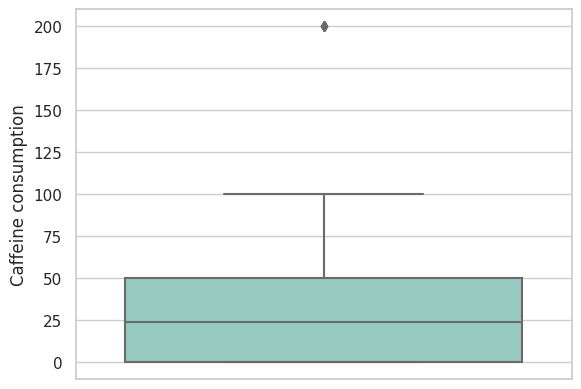

In [ ]:
sns.boxplot(data=df, y='Caffeine consumption',palette= 'Set3')

<Axes: >

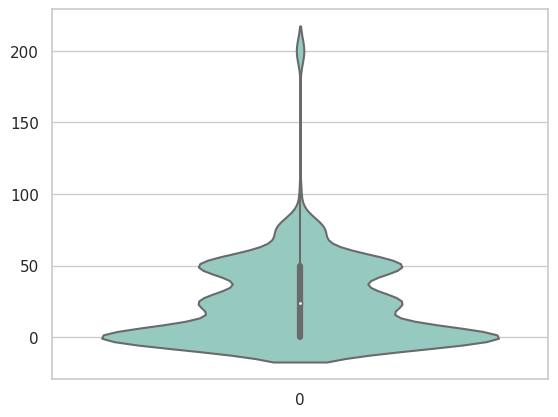

In [ ]:
sns.violinplot(data=df["Caffeine consumption"],palette="Set3")

La skewness et kurtosis prouvent que la distribution est pointue et est décalée vers la gauche par rapport à la moyenne t la médiane. C'est à dire que la majorité des pesonnes intérrogées ne boivent pas ou du moin très peu de caffé.

<Axes: xlabel='Caffeine consumption', ylabel='Count'>

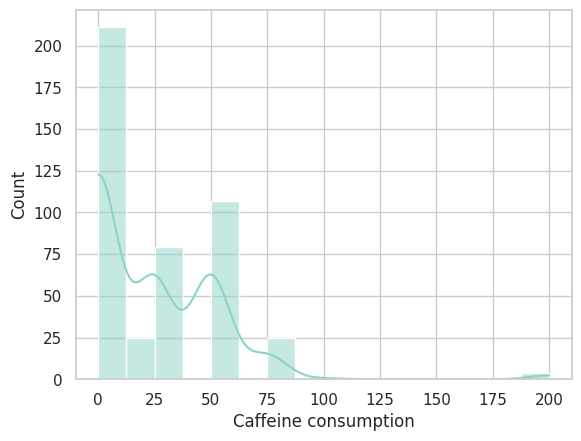

In [ ]:
sns.set(style='whitegrid',palette="Set3")
sns.histplot(data=df, x='Caffeine consumption',kde=True)

In [ ]:
echantillon = df['Caffeine consumption']
skewness_value = skew(echantillon)
print("Skewness:", skewness_value)

Skewness: 2.1879692061006977


In [ ]:
kurtosis_value = kurtosis(echantillon)
print("Kurtosis:", kurtosis_value)

Kurtosis: 9.552535859662417


À partir des kde, on remarque visuellement une distribution qui ne suit pas la loi normale et que la majorité du data set est décalé ves la gauche, chose qui vient être appuyé par le kurtosis qui est éloigné de 0, quand à la skewness positive elle assure le décalage des données vers la gauche par rapport à la moyenne ceci veut dire que la majorité des peronnes interrogées ne boivent pas ou du moins très peu de café.

Le test de shapioro rejète l'Hypothèse H0 ce qui est logique car le café influe sur le sommeil.

In [ ]:
#test de Shapiro
statistique, p_value = shapiro(echantillon)
# Afficher les résultats du test
print("Statistique de test:", statistique)
print("P-value:", p_value)

Statistique de test: 0.7286059856414795
P-value: 1.760768201258013e-26


Le test de Shapiro indique que l'hypothèse nulle H0 est rejetée, la variable ne suit pas une loi normale, c'est à dire qu'on peut prouver une dépendance entre les autres variables et celle ci.


2.**Analyses Univariées de la consommation d'alcool**   



C'est le nombre de verres d'alcool par jour. 
C'est une variable quantitative catégorielle et ordonnée. Les personnes intérrogées consomment de 0 à 5 verres par jour. la médiane est de 0 et la moyenne on ne remarque pas de valeurs abérrantes.

In [ ]:
print(df['Alcohol consumption'].describe())
print(df['Alcohol consumption'].median())

count    438.000000
mean       1.173516
std        1.621377
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: Alcohol consumption, dtype: float64
0.0


<Axes: ylabel='Alcohol consumption'>

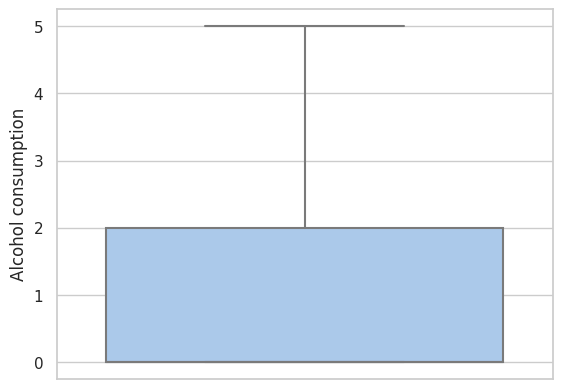

In [ ]:
sns.boxplot(data=df, y='Alcohol consumption',palette='pastel')

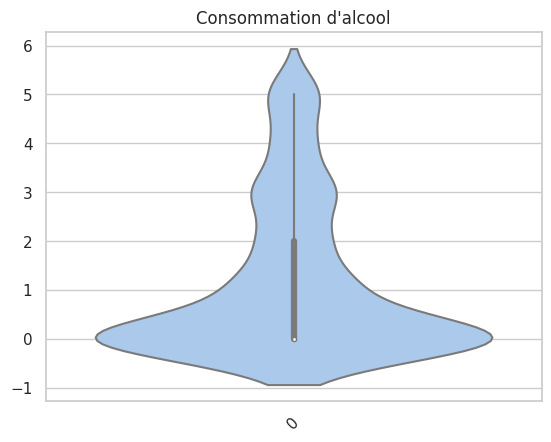

In [ ]:
sns.violinplot(data=df["Alcohol consumption"],palette="pastel")
plt.xticks(rotation=45)
plt.title("Consommation d'alcool")
plt.show()

Pour cette variable on remplace les valeurs manquantes par la moyenne.

In [ ]:
taux_dispersion_moy = ((df['Alcohol consumption'].describe()['75%'] - df['Alcohol consumption'].describe()['25%']) / df['Alcohol consumption'].describe()['mean'])
taux_dispersion_med = ((df['Alcohol consumption'].describe()['75%'] - df['Alcohol consumption'].describe()['25%']) / mediane)
print("taux_dispersion_moy",taux_dispersion_moy,"taux_dispersion_med",taux_dispersion_med)

taux_dispersion_moy 1.7042801556420233 taux_dispersion_med 0.08


In [ ]:
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].describe()['mean'])

On remarque un kde plat est décalé vers la gauche, chose qui viendra être confirmé par la skewness positive et kurtosis de 0.05 très proche de 0. Ceci implique que la majorité de personnes interrogées ne consomment pas d'alcool. et que les personnes qu'il n'y a pas de grandes différences de nombre de personnes qui  boivent de 1 à 5 verres.

<Axes: xlabel='Alcohol consumption', ylabel='Count'>

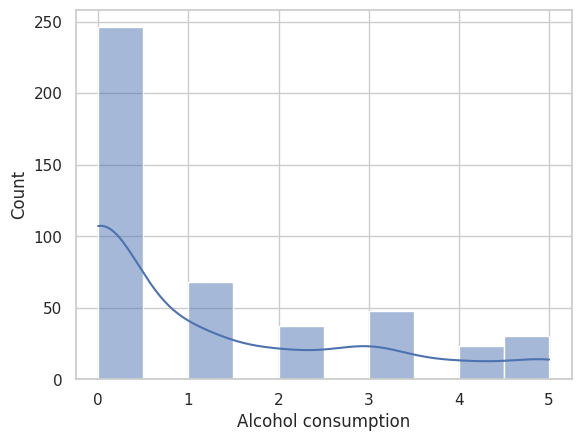

In [ ]:
sns.set(style='whitegrid')
sns.histplot(data=df, x='Alcohol consumption', kde=True)

In [ ]:
echantillon = df['Alcohol consumption']
skewness_value = skew(echantillon)
print("Skewness:", skewness_value)

Skewness: 1.1551791611469906


In [ ]:
kurtosis_value = kurtosis(echantillon)
print("Kurtosis:", kurtosis_value)

Kurtosis: 0.054147358999444783


Le test de Shapiro rejète l'hypothèse H0, La consommation d'alcool aurait des influences sur les autres variables du data set 

In [ ]:
#test de Shapiro
echantillon = df['Alcohol consumption']
statistique, p_value = shapiro(echantillon)
# Afficher les résultats du test
print("Statistique de test:", statistique)
print("P-value:", p_value)

Statistique de test: 0.7423861026763916
P-value: 6.615446715751297e-26




**3.   Analyse Univariée du tabagisme**





Cette variable nous informe si la personne interrogée fume ou pas nous l'avons transformée précédamment, en 0 et 1.
De l'histogramme et le violin plot, on constate que la majorité des personnes interogées ne consomment pas de tabac.
Cette variable n'a pas de valeurs abérantes ni de valeurs manquantes.

In [ ]:
print(df['Smoking status'].describe())
print(df['Smoking status'].median())

count    452.000000
mean       0.340708
std        0.474472
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Smoking status, dtype: float64
0.0


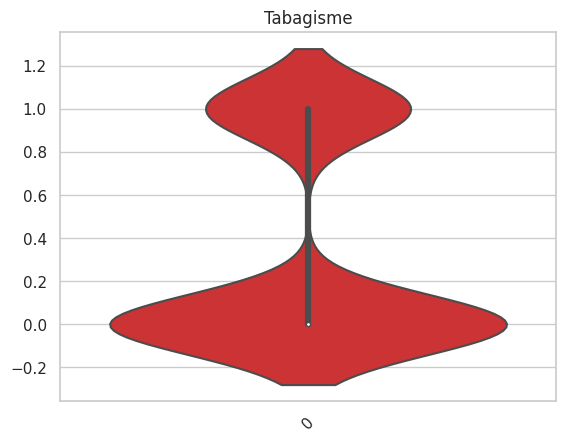

In [ ]:
sns.violinplot(data=df["Smoking status"],palette="Set1")
plt.xticks(rotation=45)
plt.title("Tabagisme")
plt.show()

<Axes: xlabel='Smoking status', ylabel='Count'>

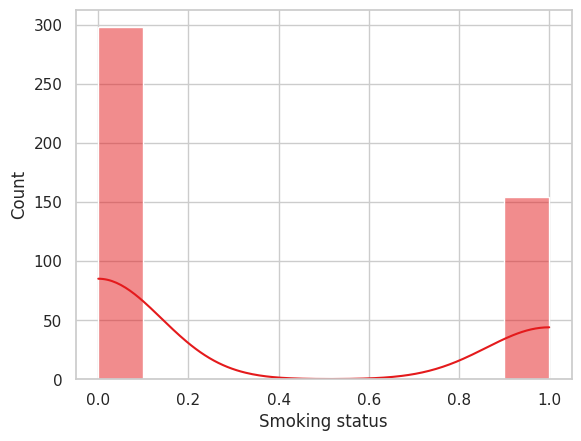

In [ ]:
sns.set(style='whitegrid',palette="Set1")
sns.histplot(data=df, x='Smoking status', kde=True)

In [ ]:
echantillon = df['Smoking status']
skewness_value = skew(echantillon)
print("Skewness:", skewness_value)

Skewness: 0.6721930217987003


In [ ]:
kurtosis_value = kurtosis(echantillon)
print("Kurtosis:", kurtosis_value)

Kurtosis: -1.5481565414451322


Le test de Shapiro nous informe que la consomation de la cigarette a des influences sur les autres variables de nos données

In [ ]:
#test de Shapiro
statistique, p_value = shapiro(echantillon)
print("Statistique de test:", statistique)
print("P-value:", p_value)

Statistique de test: 0.5985255837440491
P-value: 5.149296732166881e-31


**4.Analyse Univariée de la fréquence de la pratique sportive**

La fréquence sportive est le nombre d'heures de sport recencées dans les 24 précédant le test.
C'est une variable quantitative discrète qui a quelques valeurs manquantes mais qui ne présente pas d'outliers.
Le minimum est 0h le maximum est de 5h.
la médiane est de 2h et la moyenne 1.79h

In [ ]:
mediane = df['Exercise frequency'].median()
print(df['Exercise frequency'].describe())
print("Médiane",mediane)

count    446.000000
mean       1.791480
std        1.428134
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Exercise frequency, dtype: float64
Médiane 2.0


<Axes: ylabel='Exercise frequency'>

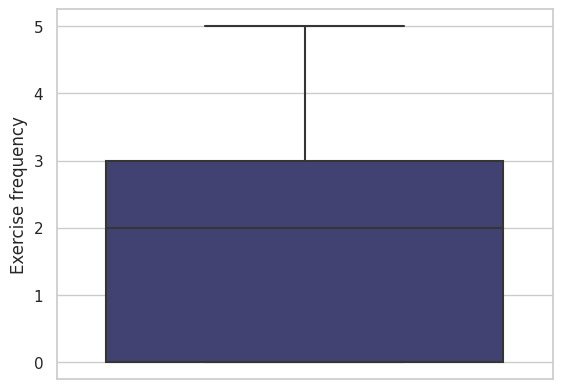

In [ ]:
sns.boxplot(data=df, y='Exercise frequency',palette='tab20b')

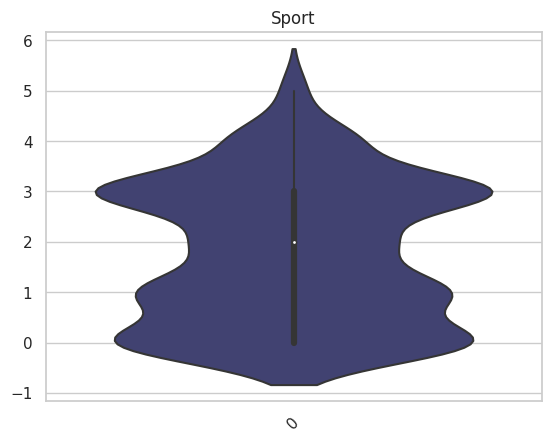

In [ ]:
sns.violinplot(data=df["Exercise frequency"],palette="tab20b")
plt.xticks(rotation=45)
plt.title("Sport")
plt.show()

Pour cette variable on remplace les valeurs manquantes par la moyenne.

In [ ]:
taux_dispersion_moy = ((df['Exercise frequency'].describe()['75%'] - df['Exercise frequency'].describe()['25%']) / df['Exercise frequency'].describe()['mean'])
taux_dispersion_med = ((df['Exercise frequency'].describe()['75%'] - df['Exercise frequency'].describe()['25%']) / mediane)
print("taux_dispersion_moy",taux_dispersion_moy,"taux_dispersion_med",taux_dispersion_med)

taux_dispersion_moy 1.67459324155194 taux_dispersion_med 1.5


In [ ]:
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].describe()['mean'])

Les kde illustrent la skewness et le kurtosis. On remarque que la classe modale est 3 et que cette variable est distribuée de la façon suivante: -la majorité des personnes se trouvent dans des classes de moins de 3h de sport dans les 24h précedantes et une distribution qui est assez pointue, on le remarque bien au niveau des 3h.
La majorité de personnes pratiques moins de la moyenne(1.79h) et de la médiane(2h) (courbe légerement décalée à gauche) 

<Axes: xlabel='Exercise frequency', ylabel='Count'>

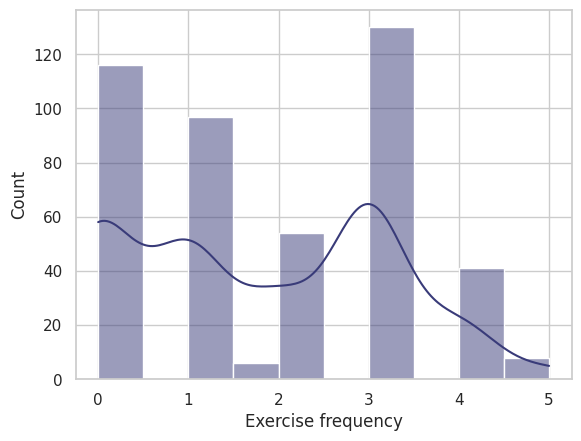

In [ ]:
sns.set(style='whitegrid',palette="tab20b")
sns.histplot(data=df, x='Exercise frequency', kde=True)

In [ ]:
echantillon = df['Exercise frequency']
skewness_value = skew(echantillon)
print("Skewness:", skewness_value)

Skewness: 0.17168615527635028


In [ ]:
kurtosis_value = kurtosis(echantillon)
print("Kurtosis:", kurtosis_value)

Kurtosis: -1.1708521168271462


Le test de Shapiro rejète l'hypothèse H0, l'exercice physique a bien un effet sur les autres colonnes du tableau.

In [ ]:
#test de Shapiro
statistique, p_value = shapiro(echantillon)
# Afficher les résultats du test
print("Statistique de test:", statistique)
print("P-value:", p_value)

Statistique de test: 0.8878028392791748
P-value: 1.2195309059326499e-17


# Analyse Bivariée des facteurs externes entre eux et avec la sleep efficiency 

**1.Analyse Bivariée Cafféine-Alcool**

En supposant que la consommation de cafféine et d'alcool sont des variables catégorielles, afin de prouver leurs dépendance ou indépendance je propose un test Khi2.
Et il s'avère pas significatif, la consommation d'alcool n'a pas d'influence sur la consommation de café 

In [ ]:
contingency_table = pd.crosstab(df['Caffeine consumption'], df['Alcohol consumption'])

# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 140.93083093693338
P-value : 2.394569767964739e-14
Degrés de liberté : 36
Tableau des fréquences attendues : [[1.14836283e+02 2.52079646e+01 6.53539823e+00 1.72721239e+01
  2.24070796e+01 1.07367257e+01 1.40044248e+01]
 [1.36061947e+01 2.98672566e+00 7.74336283e-01 2.04646018e+00
  2.65486726e+00 1.27212389e+00 1.65929204e+00]
 [4.29955752e+01 9.43805310e+00 2.44690265e+00 6.46681416e+00
  8.38938053e+00 4.01991150e+00 5.24336283e+00]
 [5.82345133e+01 1.27831858e+01 3.31415929e+00 8.75884956e+00
  1.13628319e+01 5.44469027e+00 7.10176991e+00]
 [1.36061947e+01 2.98672566e+00 7.74336283e-01 2.04646018e+00
  2.65486726e+00 1.27212389e+00 1.65929204e+00]
 [5.44247788e-01 1.19469027e-01 3.09734513e-02 8.18584071e-02
  1.06194690e-01 5.08849558e-02 6.63716814e-02]
 [2.17699115e+00 4.77876106e-01 1.23893805e-01 3.27433628e-01
  4.24778761e-01 2.03539823e-01 2.65486726e-01]]


Le scatter plot ne reflète pas de dépendance significative en ces variables.

<ipython-input-174-85c16dd630c4>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



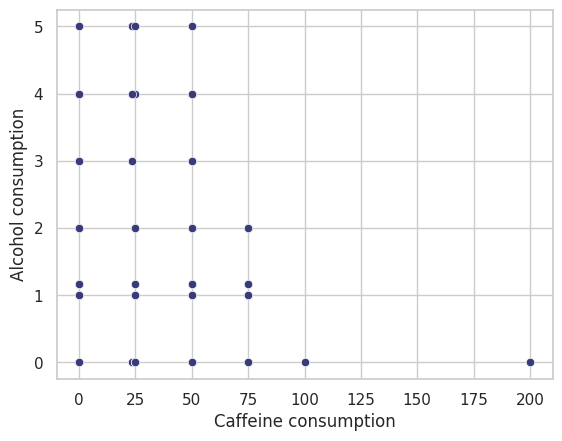

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Caffeine consumption', y='Alcohol consumption', data=df,palette='Set1')
plt.show()

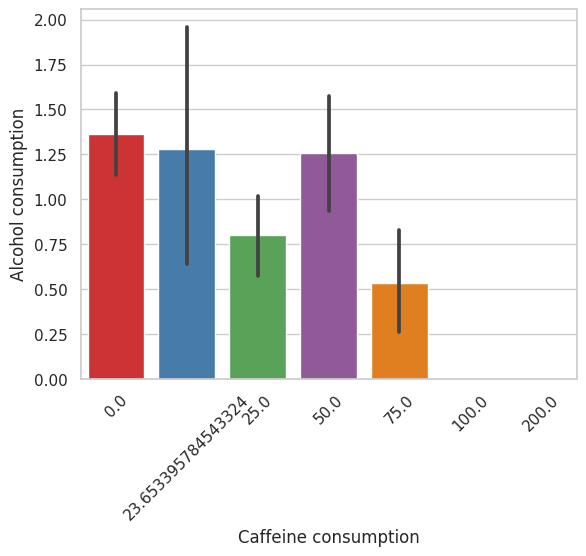

In [ ]:
# Création d'un bar plot
sns.barplot(x='Caffeine consumption', y='Alcohol consumption', data=df,palette='Set1')
plt.xticks(rotation=45)
plt.show()

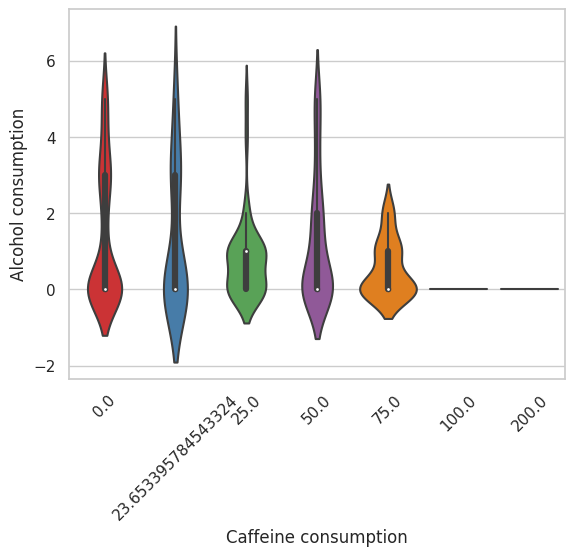

In [252]:
sns.violinplot(x='Caffeine consumption', y='Alcohol consumption', data=df,palette='Set1')
plt.xticks(rotation=45)
plt.show()

Des 3 derniers graphiques on ne remarque pas de corrélation entres ses deux variables 

**2-Analyse Bivariée Cafféine-tabagisme**


Le test de Khi2 nous montre une grande liaison entre le tabagisme et la consommation de caffé en supposant que les deux variables sont catégorielles.

In [ ]:
contingency_table = pd.crosstab(df['Caffeine consumption'], df['Smoking status'])

# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 4.38054025410243
P-value : 0.6253238907337466
Degrés de liberté : 6
Tableau des fréquences attendues : [[139.11061947  71.88938053]
 [ 16.48230088   8.51769912]
 [ 52.0840708   26.9159292 ]
 [ 70.54424779  36.45575221]
 [ 16.48230088   8.51769912]
 [  0.65929204   0.34070796]
 [  2.63716814   1.36283186]]


<ipython-input-244-7c612ee471ad>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



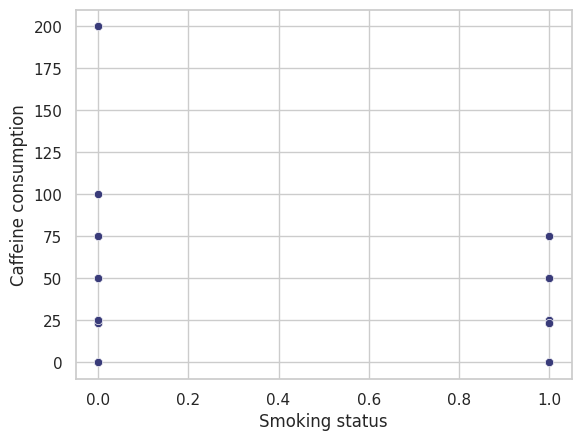

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Smoking status', y='Caffeine consumption', data=df,palette='Set2')
plt.show()

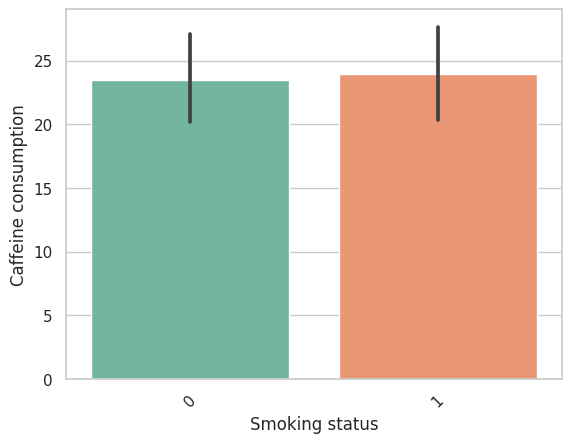

In [ ]:
# Création d'un bar plot
sns.barplot(x='Smoking status', y='Caffeine consumption', data=df,palette='Set2')
plt.xticks(rotation=45)
plt.show()

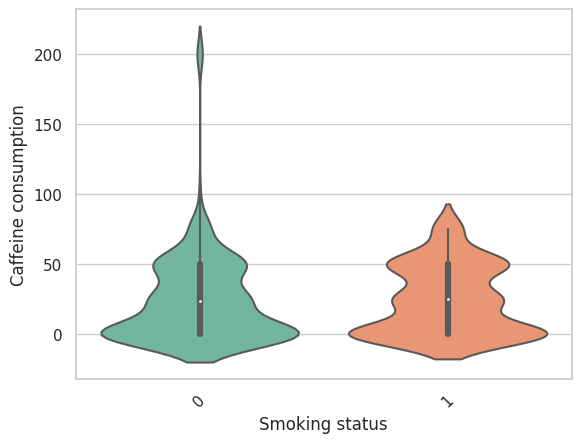

In [251]:
sns.violinplot(x='Smoking status', y='Caffeine consumption', data=df,palette='Set2')
plt.xticks(rotation=45)
plt.show()

En ce qui concerne les graphiques aucun ne présente de corrélation entre les deux variables

**3-Analyse Bivariée Cafféine-Sport**

Le test Khi 2 entre les classes de temps de sport et de cafféine ne sont pas significatives c'est à dire que les deux variables ne sont pas liées.

In [ ]:
contingency_table = pd.crosstab(df['Caffeine consumption'], df['Exercise frequency'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 281.3210041088071
P-value : 8.614808637200693e-40
Degrés de liberté : 36
Tableau des fréquences attendues : [[5.41504425e+01 4.52809735e+01 2.80088496e+00 2.52079646e+01
  6.06858407e+01 1.91393805e+01 3.73451327e+00]
 [6.41592920e+00 5.36504425e+00 3.31858407e-01 2.98672566e+00
  7.19026549e+00 2.26769912e+00 4.42477876e-01]
 [2.02743363e+01 1.69535398e+01 1.04867257e+00 9.43805310e+00
  2.27212389e+01 7.16592920e+00 1.39823009e+00]
 [2.74601770e+01 2.29623894e+01 1.42035398e+00 1.27831858e+01
  3.07743363e+01 9.70575221e+00 1.89380531e+00]
 [6.41592920e+00 5.36504425e+00 3.31858407e-01 2.98672566e+00
  7.19026549e+00 2.26769912e+00 4.42477876e-01]
 [2.56637168e-01 2.14601770e-01 1.32743363e-02 1.19469027e-01
  2.87610619e-01 9.07079646e-02 1.76991150e-02]
 [1.02654867e+00 8.58407080e-01 5.30973451e-02 4.77876106e-01
  1.15044248e+00 3.62831858e-01 7.07964602e-02]]


<ipython-input-186-a4953e85313c>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



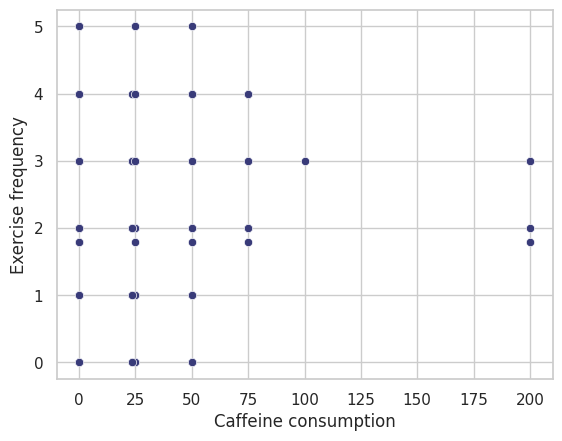

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Caffeine consumption', y='Exercise frequency', data=df,palette='Set3')
plt.show()

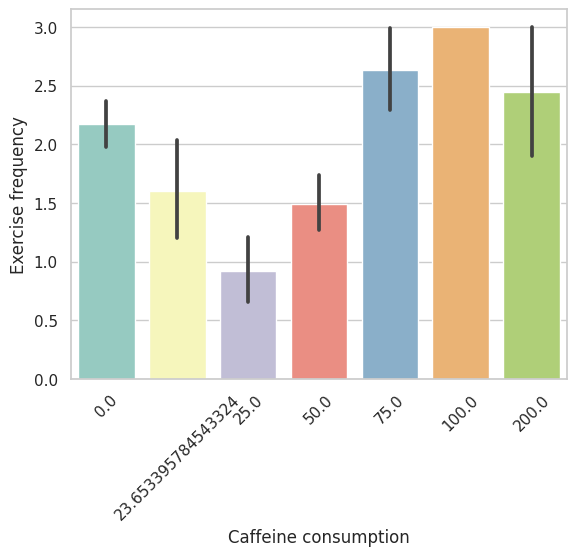

In [ ]:
# Création d'un bar plot
sns.barplot(x='Caffeine consumption', y='Exercise frequency', data=df,palette='Set3')
plt.xticks(rotation=45)
plt.show()

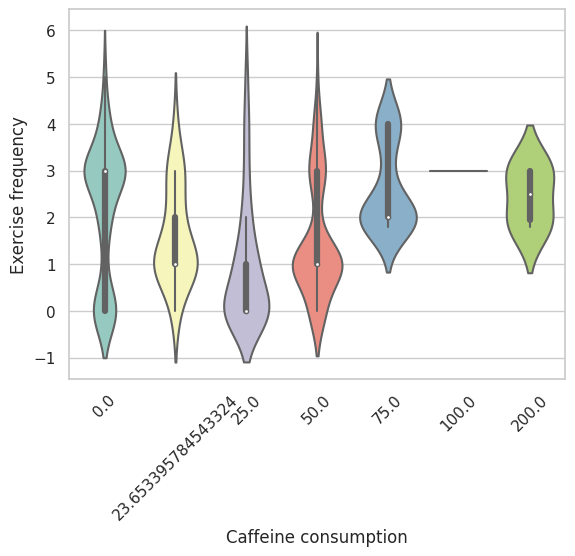

In [250]:
sns.violinplot(x='Caffeine consumption', y='Exercise frequency', data=df,palette='Set3')
plt.xticks(rotation=45)
plt.show()

On obtient des graphiques assez similaires dont on ne peut pas vraiment distinguer de corrélation entre les variables de consommation de caféine et la fréquence d'exercice physique.

**4-Analyse Bivariée Cafféine-Sleep_Efficiency**

La question que tout le monde se pose est: est ce que la caféine a un effet sur la qualté du sommeil? 
Le test de Shapiro montre une grande significativité entre ses deux variables! Donc oui le café a un influence sur notre qualité de sommeil.

In [ ]:
contingency_table = pd.crosstab(df['Caffeine consumption'], df['Sleep efficiency'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 253.94765511703275
P-value : 0.9559498478337192
Degrés de liberté : 294
Tableau des fréquences attendues : [[3.73451327e+00 3.73451327e+00 4.20132743e+00 2.80088496e+00
  3.73451327e+00 3.26769912e+00 9.33628319e-01 9.33628319e-01
  1.40044248e+00 9.33628319e-01 2.80088496e+00 9.33628319e-01
  1.86725664e+00 4.20132743e+00 3.73451327e+00 1.86725664e+00
  3.26769912e+00 3.73451327e+00 4.20132743e+00 4.66814159e-01
  1.40044248e+00 5.13495575e+00 5.60176991e+00 3.26769912e+00
  1.86725664e+00 3.73451327e+00 3.26769912e+00 6.06858407e+00
  4.20132743e+00 3.73451327e+00 5.13495575e+00 5.60176991e+00
  5.13495575e+00 4.66814159e+00 5.60176991e+00 5.60176991e+00
  5.60176991e+00 1.02699115e+01 6.06858407e+00 3.26769912e+00
  1.35376106e+01 8.86946903e+00 6.06858407e+00 1.02699115e+01
  8.40265487e+00 9.80309735e+00 3.26769912e+00 4.66814159e-01
  1.86725664e+00 4.66814159e-01]
 [4.42477876e-01 4.42477876e-01 4.97787611e-01 3.31858407e-01
  4.42477876e-01 3.8

<ipython-input-191-486954ac8766>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



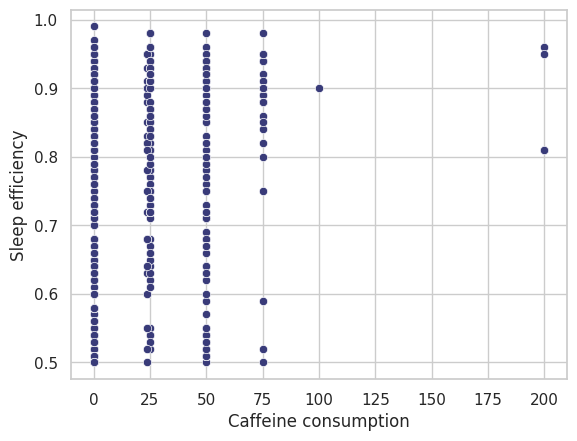

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Caffeine consumption', y='Sleep efficiency', data=df,palette='tab10')
plt.show()

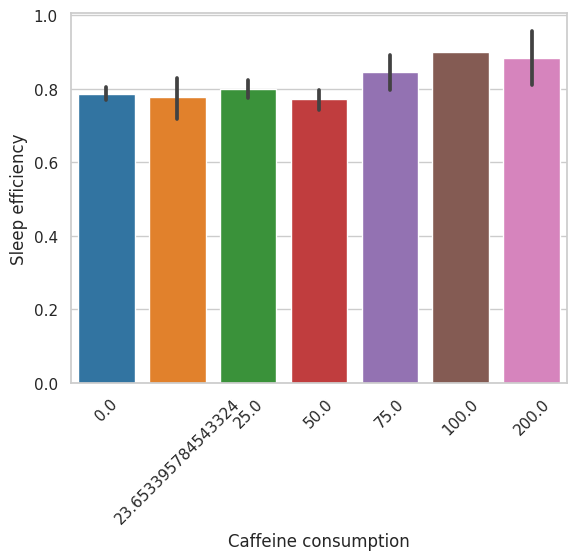

In [ ]:
# Création d'un bar plot
sns.barplot(x='Caffeine consumption', y='Sleep efficiency', data=df,palette='tab10')
plt.xticks(rotation=45)
plt.show()

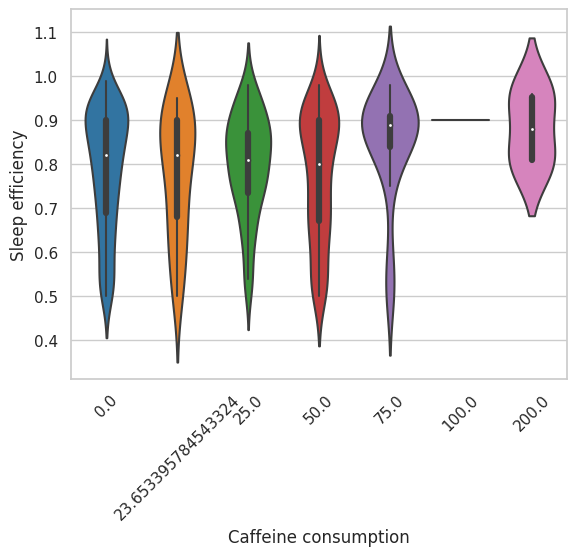

In [249]:
sns.violinplot(x='Caffeine consumption', y='Sleep efficiency', data=df,palette='tab10')
plt.xticks(rotation=45)
plt.show()

En plus du test de Shapiro, les graphiques montrent une bonne corélation entre la prise de cffé et la qualité du sommeil. Et ce qui est étonnant est que la consommation de café est positivement corrélée avec la qualité de notre sommeil, ce qui veut dire que les personnes qui consomme plus de café ont tendnace à avoir des sommeils plus réparateurs.


**5-Analyse Bivariée Consommation d'alcool - tabagisme**

Le test Khi2 prouve que la prise d'alcool est liée au tabagisme.

In [ ]:
contingency_table = pd.crosstab(df['Alcohol consumption'], df['Smoking status'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 4.478074132055632
P-value : 0.6122658466133846
Degrés de liberté : 6
Tableau des fréquences attendues : [[162.18584071  83.81415929]
 [ 35.60176991  18.39823009]
 [  9.2300885    4.7699115 ]
 [ 24.39380531  12.60619469]
 [ 31.6460177   16.3539823 ]
 [ 15.16371681   7.83628319]
 [ 19.77876106  10.22123894]]


<ipython-input-245-ee37e6f49ec2>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



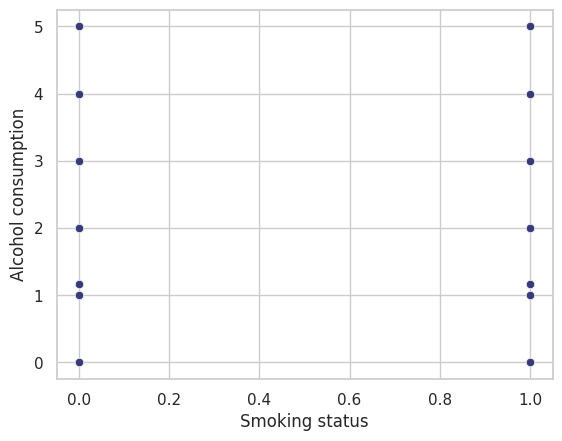

In [245]:
# Création d'un scatter plot
sns.scatterplot(x='Smoking status', y='Alcohol consumption', data=df,palette='deep')
plt.show()

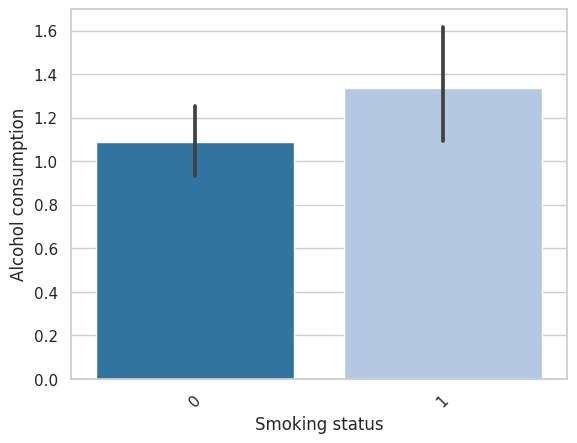

In [ ]:
# Création d'un bar plot
sns.barplot(x='Smoking status', y='Alcohol consumption', data=df,palette='tab20')
plt.xticks(rotation=45)
plt.show()

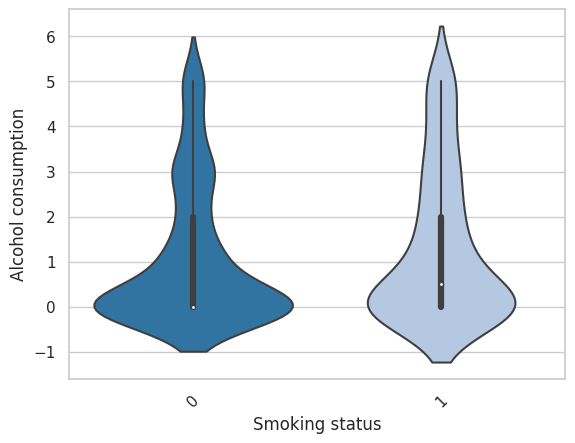

In [248]:
# Création d'un boxplot
sns.violinplot(x='Smoking status', y='Alcohol consumption', data=df,palette='tab20')
plt.xticks(rotation=45)
plt.show()

À partir des graphiques, on remarque que le tabagisme augmentrait les chances de tomber sur une personne qui consomme plus d'alcool dans notre base de données.

**6-Analyse Bivariée Consommation d'alcool et Sleep Efficiency**

Le test de Khi2 montre que la consommation d'alcool n'a pas de corrélation significative avec la qualité du sommeil. 

In [ ]:
contingency_table = pd.crosstab(df['Alcohol consumption'], df['Sleep efficiency'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 382.5882444639797
P-value : 0.00038033565481978773
Degrés de liberté : 294
Tableau des fréquences attendues : [[ 4.3539823   4.3539823   4.89823009  3.26548673  4.3539823   3.80973451
   1.08849558  1.08849558  1.63274336  1.08849558  3.26548673  1.08849558
   2.17699115  4.89823009  4.3539823   2.17699115  3.80973451  4.3539823
   4.89823009  0.54424779  1.63274336  5.98672566  6.53097345  3.80973451
   2.17699115  4.3539823   3.80973451  7.07522124  4.89823009  4.3539823
   5.98672566  6.53097345  5.98672566  5.44247788  6.53097345  6.53097345
   6.53097345 11.97345133  7.07522124  3.80973451 15.78318584 10.34070796
   7.07522124 11.97345133  9.79646018 11.42920354  3.80973451  0.54424779
   2.17699115  0.54424779]
 [ 0.95575221  0.95575221  1.07522124  0.71681416  0.95575221  0.83628319
   0.23893805  0.23893805  0.35840708  0.23893805  0.71681416  0.23893805
   0.47787611  1.07522124  0.95575221  0.47787611  0.83628319  0.95575221
   1.07522124  0.

<ipython-input-205-8b205e64c0a7>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



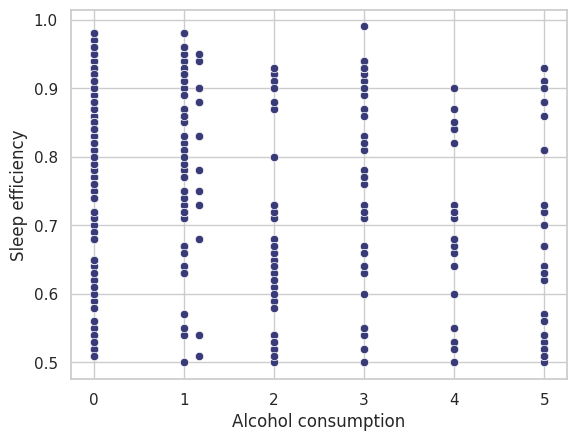

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Alcohol consumption', y='Sleep efficiency', data=df,palette='tab20b')
plt.show()

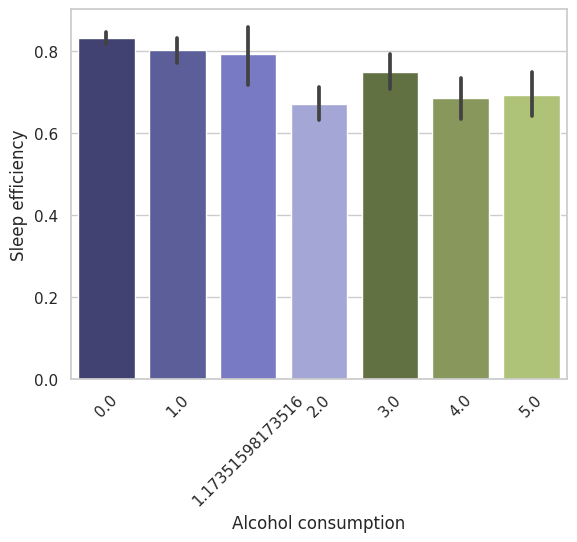

In [ ]:
# Création d'un bar plot
sns.barplot(x='Alcohol consumption', y='Sleep efficiency', data=df,palette='tab20b')
plt.xticks(rotation=45)
plt.show()

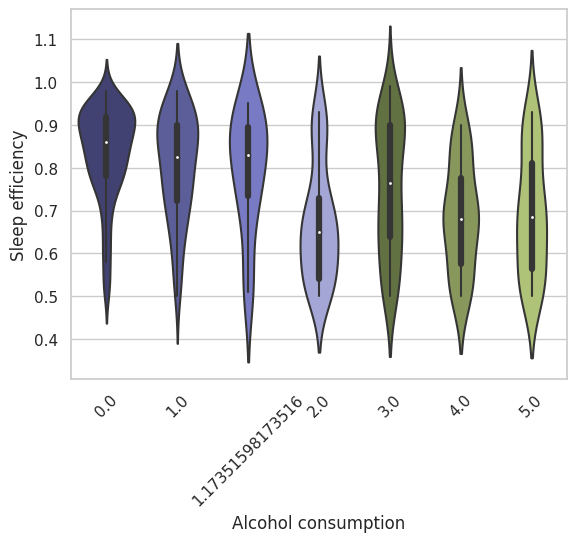

In [247]:
# Création d'un boxplot
sns.violinplot(x='Alcohol consumption', y='Sleep efficiency', data=df,palette='tab20b')
plt.xticks(rotation=45)
plt.show()

Les graphes précédents ne relèvent aucune corrélation entre la qualité du sommeil et la consommation d'alcool.

**7-Analyse Bivariée Consommation d'alcool et sport**

La consommation d'alcool et le sport ne sont pas lié d'une manière significative selon la p-value du test Khi2.

In [ ]:
contingency_table = pd.crosstab(df['Alcohol consumption'], df['Exercise frequency'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 90.50382714909614
P-value : 1.3753017346174319e-06
Degrés de liberté : 36
Tableau des fréquences attendues : [[63.13274336 52.7920354   3.26548673 29.38938053 70.75221239 22.31415929
   4.3539823 ]
 [13.85840708 11.58849558  0.71681416  6.45132743 15.53097345  4.89823009
   0.95575221]
 [ 3.59292035  3.00442478  0.18584071  1.67256637  4.02654867  1.2699115
   0.24778761]
 [ 9.49557522  7.94026549  0.49115044  4.42035398 10.64159292  3.35619469
   0.65486726]
 [12.31858407 10.30088496  0.63716814  5.73451327 13.80530973  4.3539823
   0.84955752]
 [ 5.90265487  4.93584071  0.30530973  2.74778761  6.61504425  2.08628319
   0.40707965]
 [ 7.69911504  6.4380531   0.39823009  3.5840708   8.62831858  2.72123894
   0.53097345]]


<ipython-input-209-0c45676a1100>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



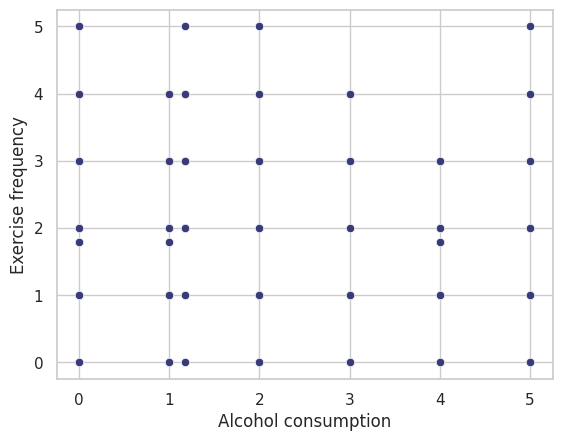

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Alcohol consumption', y='Exercise frequency', data=df,palette='tab20c')
plt.show()

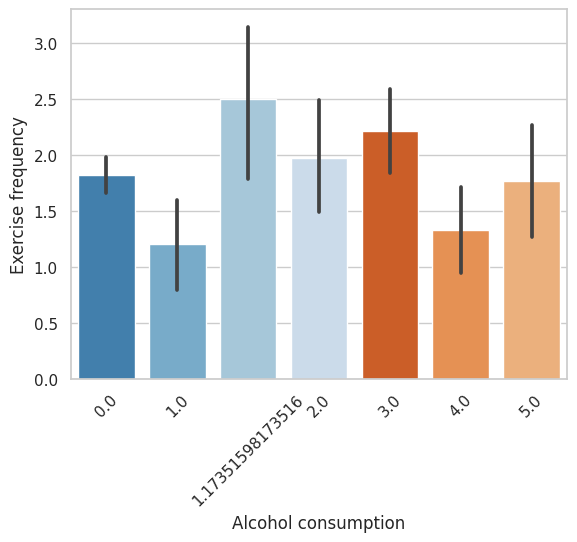

In [ ]:
# Création d'un bar plot
sns.barplot(x='Alcohol consumption', y='Exercise frequency', data=df,palette='tab20c')
plt.xticks(rotation=45)
plt.show()

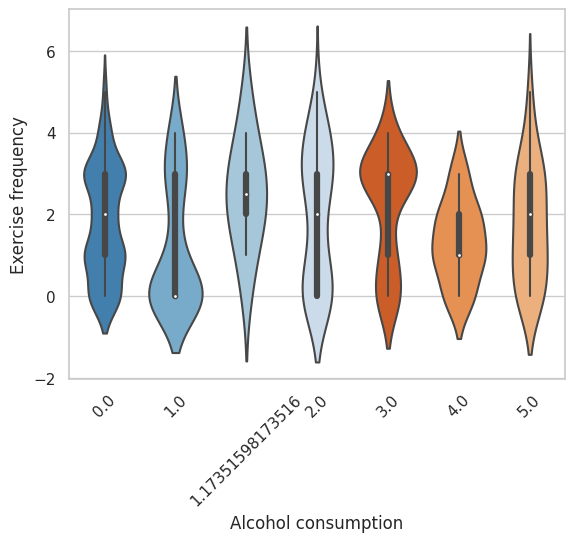

In [246]:
# Création d'un boxplot
sns.violinplot(x='Alcohol consumption', y='Exercise frequency', data=df,palette='tab20c')
plt.xticks(rotation=45)
plt.show()

Il est clair qu'à travers les derniers graphes, on ne peut pas extraire de corrélation entre la prise d'alcool et la fréquence de l'exercice physique

**8-Analyse Bivariée tabagisme - Sleep Efficiency**

Le test Khi2 montre que le tabagisme et la qualité du sommeil ne sont pas liées d'une manière significative. 

In [ ]:
contingency_table = pd.crosstab(df['Smoking status'], df['Sleep efficiency'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 122.94082017829209
P-value : 2.7527748665915435e-08
Degrés de liberté : 49
Tableau des fréquences attendues : [[ 5.27433628  5.27433628  5.93362832  3.95575221  5.27433628  4.61504425
   1.31858407  1.31858407  1.97787611  1.31858407  3.95575221  1.31858407
   2.63716814  5.93362832  5.27433628  2.63716814  4.61504425  5.27433628
   5.93362832  0.65929204  1.97787611  7.25221239  7.91150442  4.61504425
   2.63716814  5.27433628  4.61504425  8.57079646  5.93362832  5.27433628
   7.25221239  7.91150442  7.25221239  6.59292035  7.91150442  7.91150442
   7.91150442 14.50442478  8.57079646  4.61504425 19.11946903 12.52654867
   8.57079646 14.50442478 11.86725664 13.84513274  4.61504425  0.65929204
   2.63716814  0.65929204]
 [ 2.72566372  2.72566372  3.06637168  2.04424779  2.72566372  2.38495575
   0.68141593  0.68141593  1.02212389  0.68141593  2.04424779  0.68141593
   1.36283186  3.06637168  2.72566372  1.36283186  2.38495575  2.72566372
   3.06637168  

<ipython-input-213-12f265ff77c1>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



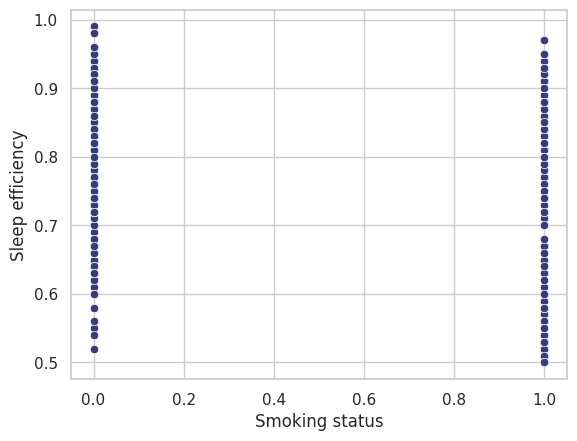

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Smoking status', y='Sleep efficiency', data=df,palette='pastel')
plt.show()

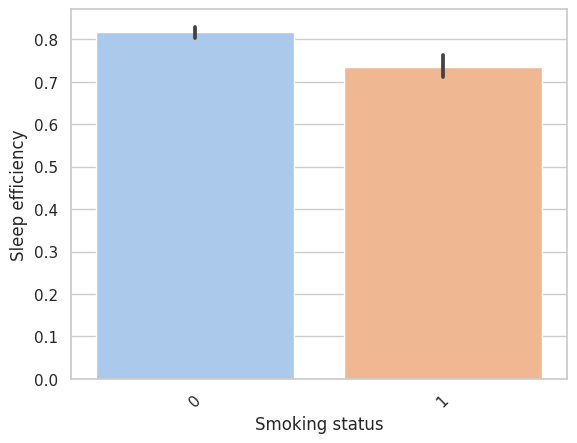

In [ ]:
# Création d'un bar plot
sns.barplot(x='Smoking status', y='Sleep efficiency', data=df,palette='pastel')
plt.xticks(rotation=45)
plt.show()

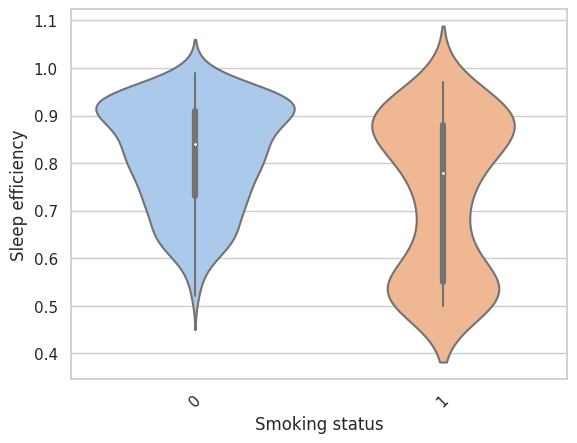

In [253]:
# Création d'un boxplot
sns.violinplot(x='Smoking status', y='Sleep efficiency', data=df,palette='pastel')
plt.xticks(rotation=45)
plt.show()

Les graphiques precedants ne montrent pas de liaison entre les deux variable on peut dire qu'elles sont indépendantes.

**9-Analyse Bivariée tabagisme - fréquence sportive**

Le test Khi 2 révèle que le tabagisme et la fréquences sportive sont deux données indépendantes et que leur liaison n'est pas significative.

In [256]:
contingency_table = pd.crosstab(df['Smoking status'], df['Exercise frequency'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 31.424877056913065
P-value : 2.1026957208393788e-05
Degrés de liberté : 6
Tableau des fréquences attendues : [[76.47787611 63.95132743  3.95575221 35.60176991 85.7079646  27.03097345
   5.27433628]
 [39.52212389 33.04867257  2.04424779 18.39823009 44.2920354  13.96902655
   2.72566372]]


<ipython-input-218-dd954477aeed>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



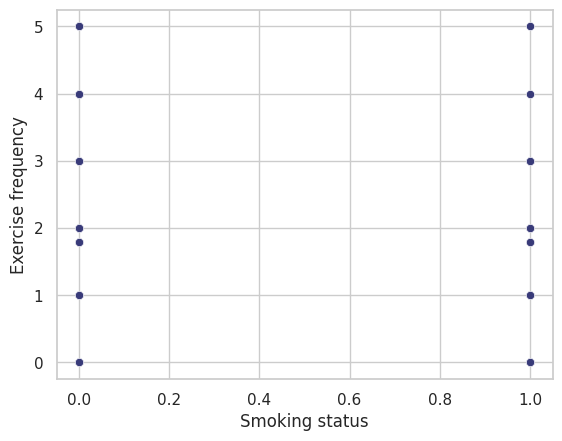

In [ ]:
# Création d'un scatter plot
sns.scatterplot(x='Smoking status', y='Exercise frequency', data=df,palette='deep')
plt.show()

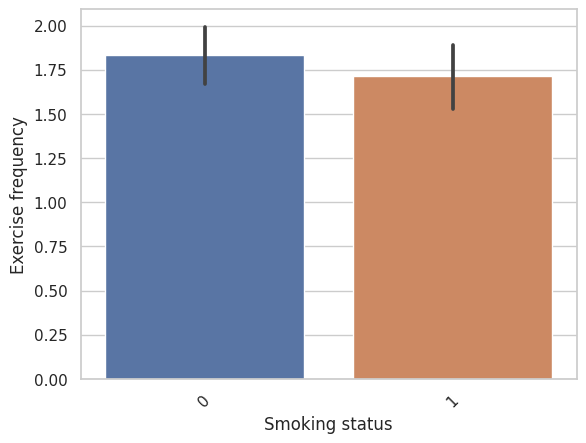

In [ ]:
# Création d'un bar plot
sns.barplot(x='Smoking status', y='Exercise frequency', data=df,palette='deep')
plt.xticks(rotation=45)
plt.show()

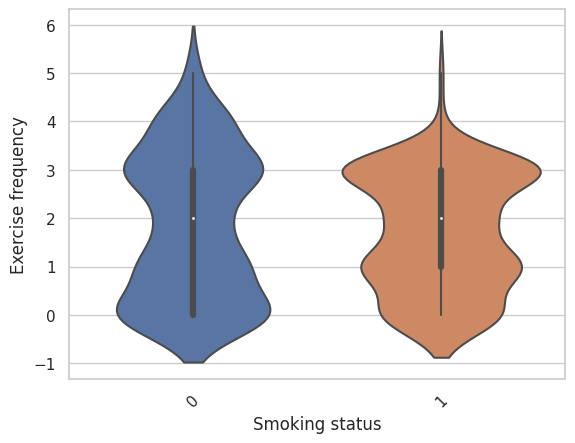

In [254]:
# Création d'un boxplot
sns.violinplot(x='Smoking status', y='Exercise frequency', data=df,palette='deep')
plt.xticks(rotation=45)
plt.show()

Les graphiques montrent que les variables de frequence sportive et de tabagisme sont indépendantes.

**10-Analyse Bivariée fréquence sportive et Sleep Efficiency**

On remarque suite au test Khi2 que la fréquence sportive est étroitement liée avec la qualité du sommeil.

In [ ]:
contingency_table = pd.crosstab(df['Sleep efficiency'], df['Exercise frequency'])
# Application du test du khi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Affichage des résultats
print("Statistique du test du khi-deux :", chi2)
print("P-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Statistique du test du khi-deux : 285.7645099153476
P-value : 0.623728452711379
Degrés de liberté : 294
Tableau des fréquences attendues : [[2.05309735 1.71681416 0.10619469 0.95575221 2.30088496 0.72566372
  0.14159292]
 [2.05309735 1.71681416 0.10619469 0.95575221 2.30088496 0.72566372
  0.14159292]
 [2.30973451 1.93141593 0.11946903 1.07522124 2.58849558 0.81637168
  0.15929204]
 [1.53982301 1.28761062 0.07964602 0.71681416 1.72566372 0.54424779
  0.10619469]
 [2.05309735 1.71681416 0.10619469 0.95575221 2.30088496 0.72566372
  0.14159292]
 [1.79646018 1.50221239 0.09292035 0.83628319 2.01327434 0.63495575
  0.12389381]
 [0.51327434 0.42920354 0.02654867 0.23893805 0.57522124 0.18141593
  0.03539823]
 [0.51327434 0.42920354 0.02654867 0.23893805 0.57522124 0.18141593
  0.03539823]
 [0.7699115  0.64380531 0.03982301 0.35840708 0.86283186 0.27212389
  0.05309735]
 [0.51327434 0.42920354 0.02654867 0.23893805 0.57522124 0.18141593
  0.03539823]
 [1.53982301 1.28761062 0.07964602 0.7168

<ipython-input-257-b6262be4d8d7>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



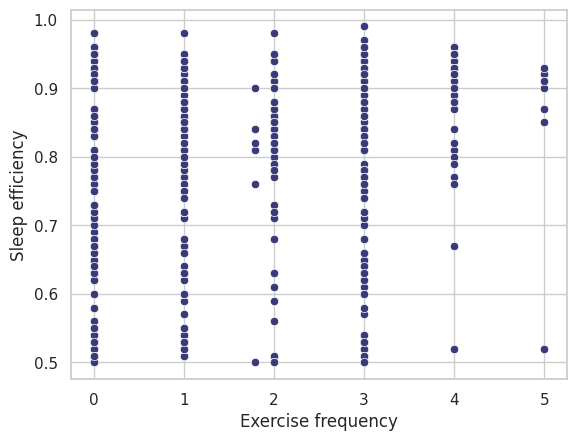

In [257]:
# Création d'un scatter plot  
sns.scatterplot(x='Exercise frequency', y='Sleep efficiency', data=df,palette='deep')
plt.show()

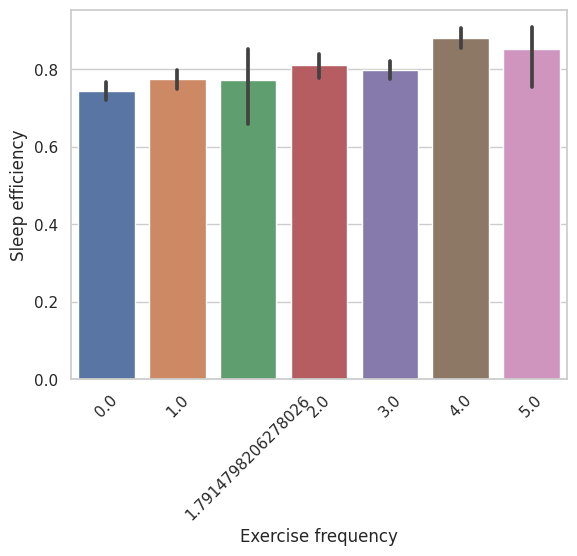

In [ ]:
# Création d'un bar plot
sns.barplot(x='Exercise frequency', y='Sleep efficiency', data=df,palette='deep')
plt.xticks(rotation=45)
plt.show()

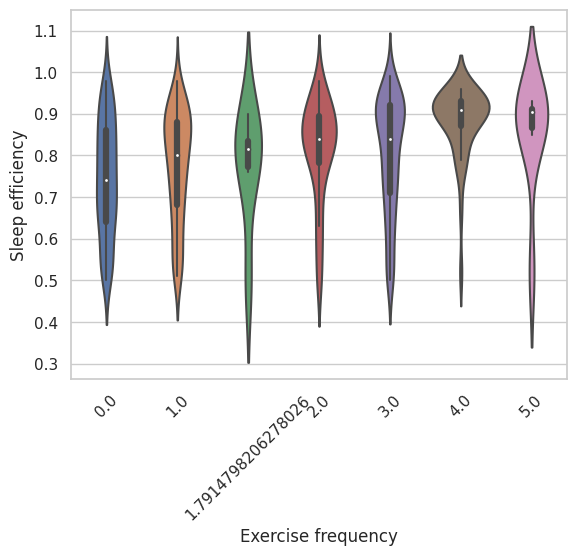

In [255]:
# Création d'un boxplot
sns.violinplot(x='Exercise frequency', y='Sleep efficiency', data=df,palette='deep')
plt.xticks(rotation=45)
plt.show()

Les graphiques montrent que les personnes qui pratiquent beaucoup de sport ont moins de chance d'avoir un sommeil qui n'est pas efficient.

**15-Heat Map et autres corrélations**

Afin d'effectuer les corrélation, on ne séléctionne que les colonnes numériques.
On remarque que le passage de catégoriel à quantitaif diminue de la significativité du lien entre les facteurs externes et la qualité du sommeil.


In [ ]:
df_num=df[["Age","Sleep duration","Sleep efficiency","Deep sleep percentage","Light sleep percentage","Awakenings","Caffeine consumption","Alcohol consumption","Smoking status",'Exercise frequency']]

<Axes: >

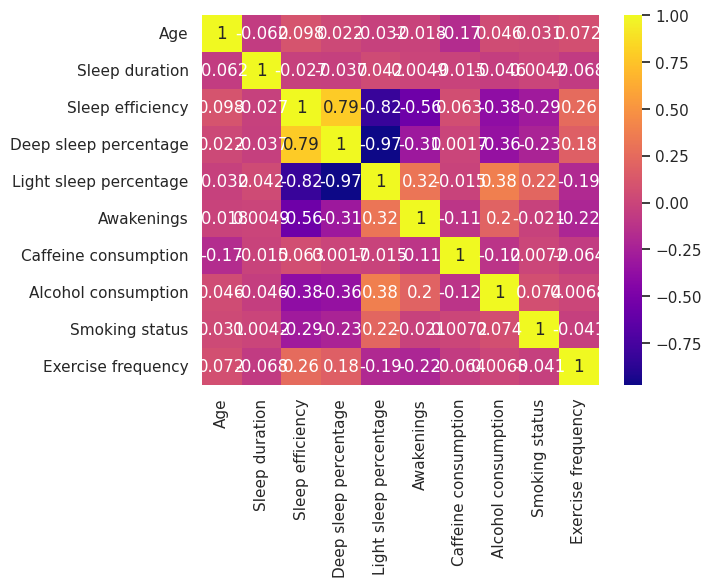

In [ ]:
# Calculer la matrice de corrélation
matrice_corr = df_num.corr()
sns.heatmap(matrice_corr, annot=True, cmap='plasma')

# PCA

On peut créer l'ACP des variables numériques (quantitatives ou catégorielles si elles admettent un ordre ou sont booléennes) 

In [261]:
df_num=df[["Age","Sleep efficiency","Deep sleep percentage","Light sleep percentage","Awakenings","Caffeine consumption","Alcohol consumption"]]

La variable "Awakenings" qui représente le nombre de fois où la personne intérrogée se réveille durant la nuit contient des NaN.
On procède au remplacement des valeurs manquantes à l'aide de la méthode précédantes (taux de dispersion), ces dernières seront remplacées par la moyenne de cette colonne.

In [262]:
mediane = df_num["Awakenings"].median()
print(df_num["Awakenings"].describe())
print("Médiane",mediane)

count    432.000000
mean       1.641204
std        1.356762
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: Awakenings, dtype: float64
Médiane 1.0


In [263]:
taux_dispersion_moy = ((df_num["Awakenings"].describe()['75%'] - df_num["Awakenings"].describe()['25%']) / df_num["Awakenings"].describe()['mean'])
taux_dispersion_med = ((df_num["Awakenings"].describe()['75%'] - df_num["Awakenings"].describe()['25%']) / mediane)
print("taux_dispersion_moy",taux_dispersion_moy,"taux_dispersion_med",taux_dispersion_med)

taux_dispersion_moy 1.2186177715091677 taux_dispersion_med 2.0


In [264]:
df_num["Awakenings"] = df_num["Awakenings"].fillna(df_num["Awakenings"].describe()['mean'])

<ipython-input-264-c134b14e8987>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



On remarque que les variables sont hétérogènes(des valeurs entre 0 à 1), des valeurs entre 0 à 200), donc il est essentielle de les normaliser les variables afin d'avoir un visuel facil à interpréter et des individus facilement séparables.

In [265]:
# Normaliser les variables
scaler = StandardScaler()
variables_df = scaler.fit_transform(df_num)

In [266]:
pca = PCA()
pca.fit(df_num)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[8.67869753e+02 4.74092339e+02 1.67219466e+02 6.14947001e+00
 2.17037252e+00 1.53324537e+00 4.02362769e-03]
[5.71328281e-01 3.12100244e-01 1.10082429e-01 4.04826429e-03
 1.42878030e-03 1.00935243e-03 2.64879872e-06]


Ici nous définission les valeurs propre de la matrice de covariances einsi que le taux d'information généré par chaque axe associé.
Celon le critède keiser on peut se limiter à 2 dimensions car on dépasse 87% d'informations. 

In [267]:
# Création du DataFrame "eig"
eig = pd.DataFrame(
    {
        "Dimension": ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))],
        "Variance expliquée": pca.explained_variance_,
        "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,867.869753,57.0,57.0
1,Dim2,474.092339,31.0,88.0
2,Dim3,167.219466,11.0,99.0
3,Dim4,6.149470,0.0,100.0
4,Dim5,2.170373,0.0,100.0
5,Dim6,1.533245,0.0,100.0
6,Dim7,0.004024,0.0,100.0


Dans cette partie on transvase nos données en coordonnées sur nos nouveux axes

In [268]:
df_pca = pca.transform(df_num)
df_pca

array([[-2.55992447e+01, -2.20154021e+01, -2.17915386e+01, ...,
        -1.41255964e+00, -1.10736983e+00,  5.60739038e-02],
       [-2.67017087e+01,  3.66490044e+01, -2.73364468e+01, ...,
         3.70223503e-01,  4.21131153e-01, -8.37974434e-02],
       [-2.32517545e+01, -2.27032197e+01,  3.11150942e+00, ...,
        -8.87645108e-01, -1.84985731e-01,  8.70055523e-03],
       ...,
       [-3.63973958e-01,  3.12900764e+01, -5.30678378e-01, ...,
         4.66030024e-01, -1.45783739e+00,  1.03715546e-01],
       [-2.37167986e+01, -2.42317057e+01, -1.80484620e+00, ...,
        -5.32999198e-01,  1.77380809e+00,  7.41647402e-02],
       [ 2.78060100e+01,  4.33867501e+01,  1.86017713e+01, ...,
        -2.39827129e+00, -8.69837657e-01, -1.58481361e-02]])

Grâce à ce tableau on peut juger la qualité du sommeil de chaque individu à partir de leurs coordonées 

In [269]:
df_pca = pd.DataFrame({
    "Dim1" : df_pca[:,0], 
    "Dim2" : df_pca[:,1],
    "Sleep Efficiency":df_num["Sleep efficiency"]
})

# Résultat (premières lignes)
df_pca.head()

,Dim1,Dim2,Sleep Efficiency
0,-25.599245,-22.015402,0.88
1,-26.701709,36.649004,0.66
2,-23.251755,-22.703220,0.89
3,25.759642,39.428154,0.51
4,-25.035146,-6.751459,0.76


Ce tableau génère la corrélation et donc la contribution de chaque axe sur chacun des axes.

In [270]:
n = df_num.shape[0] # nb individus
p = df_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval =np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': df_num.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,Age,-2.741129,-0.600532
1,Sleep efficiency,0.008903,-0.109285
2,Deep sleep percentage,0.150367,-15.536238
3,Light sleep percentage,-0.345361,15.190231
4,Awakenings,-0.139396,0.408515
5,Caffeine consumption,29.295679,0.208484
6,Alcohol consumption,-0.194124,0.585402


Pour l'interprétation des variables on peut dire:
1-L'axe principal (dim 1) est expliquée par la consommation de caféine, c'est la variable la mieux représentée de toute, plus un individu sera à droite, plus il consommera de caféine
2-Le light sleep (moyennement bien représenté) explique l'axe secondaire (dim 2) plus une personne sera en haut plus elle aura tendance à avoir un sommeil plus léger.
3-Le deep sleep (moyennement bien représenté) explique l'axe secondaire (dim 2) plus une personne sera en haut plus elle aura tendance à avoir un sommeil plus profond.
4-L'âge est moins bien représenté: plus les individus seront à droite vers le bas plus ils seront agés.
5-La consommation d'alcool et le nombre de reveils par nuits sont mal représentés et sont très corrélées.
6-La sleep efficiency et la variable la moins bien représentée.

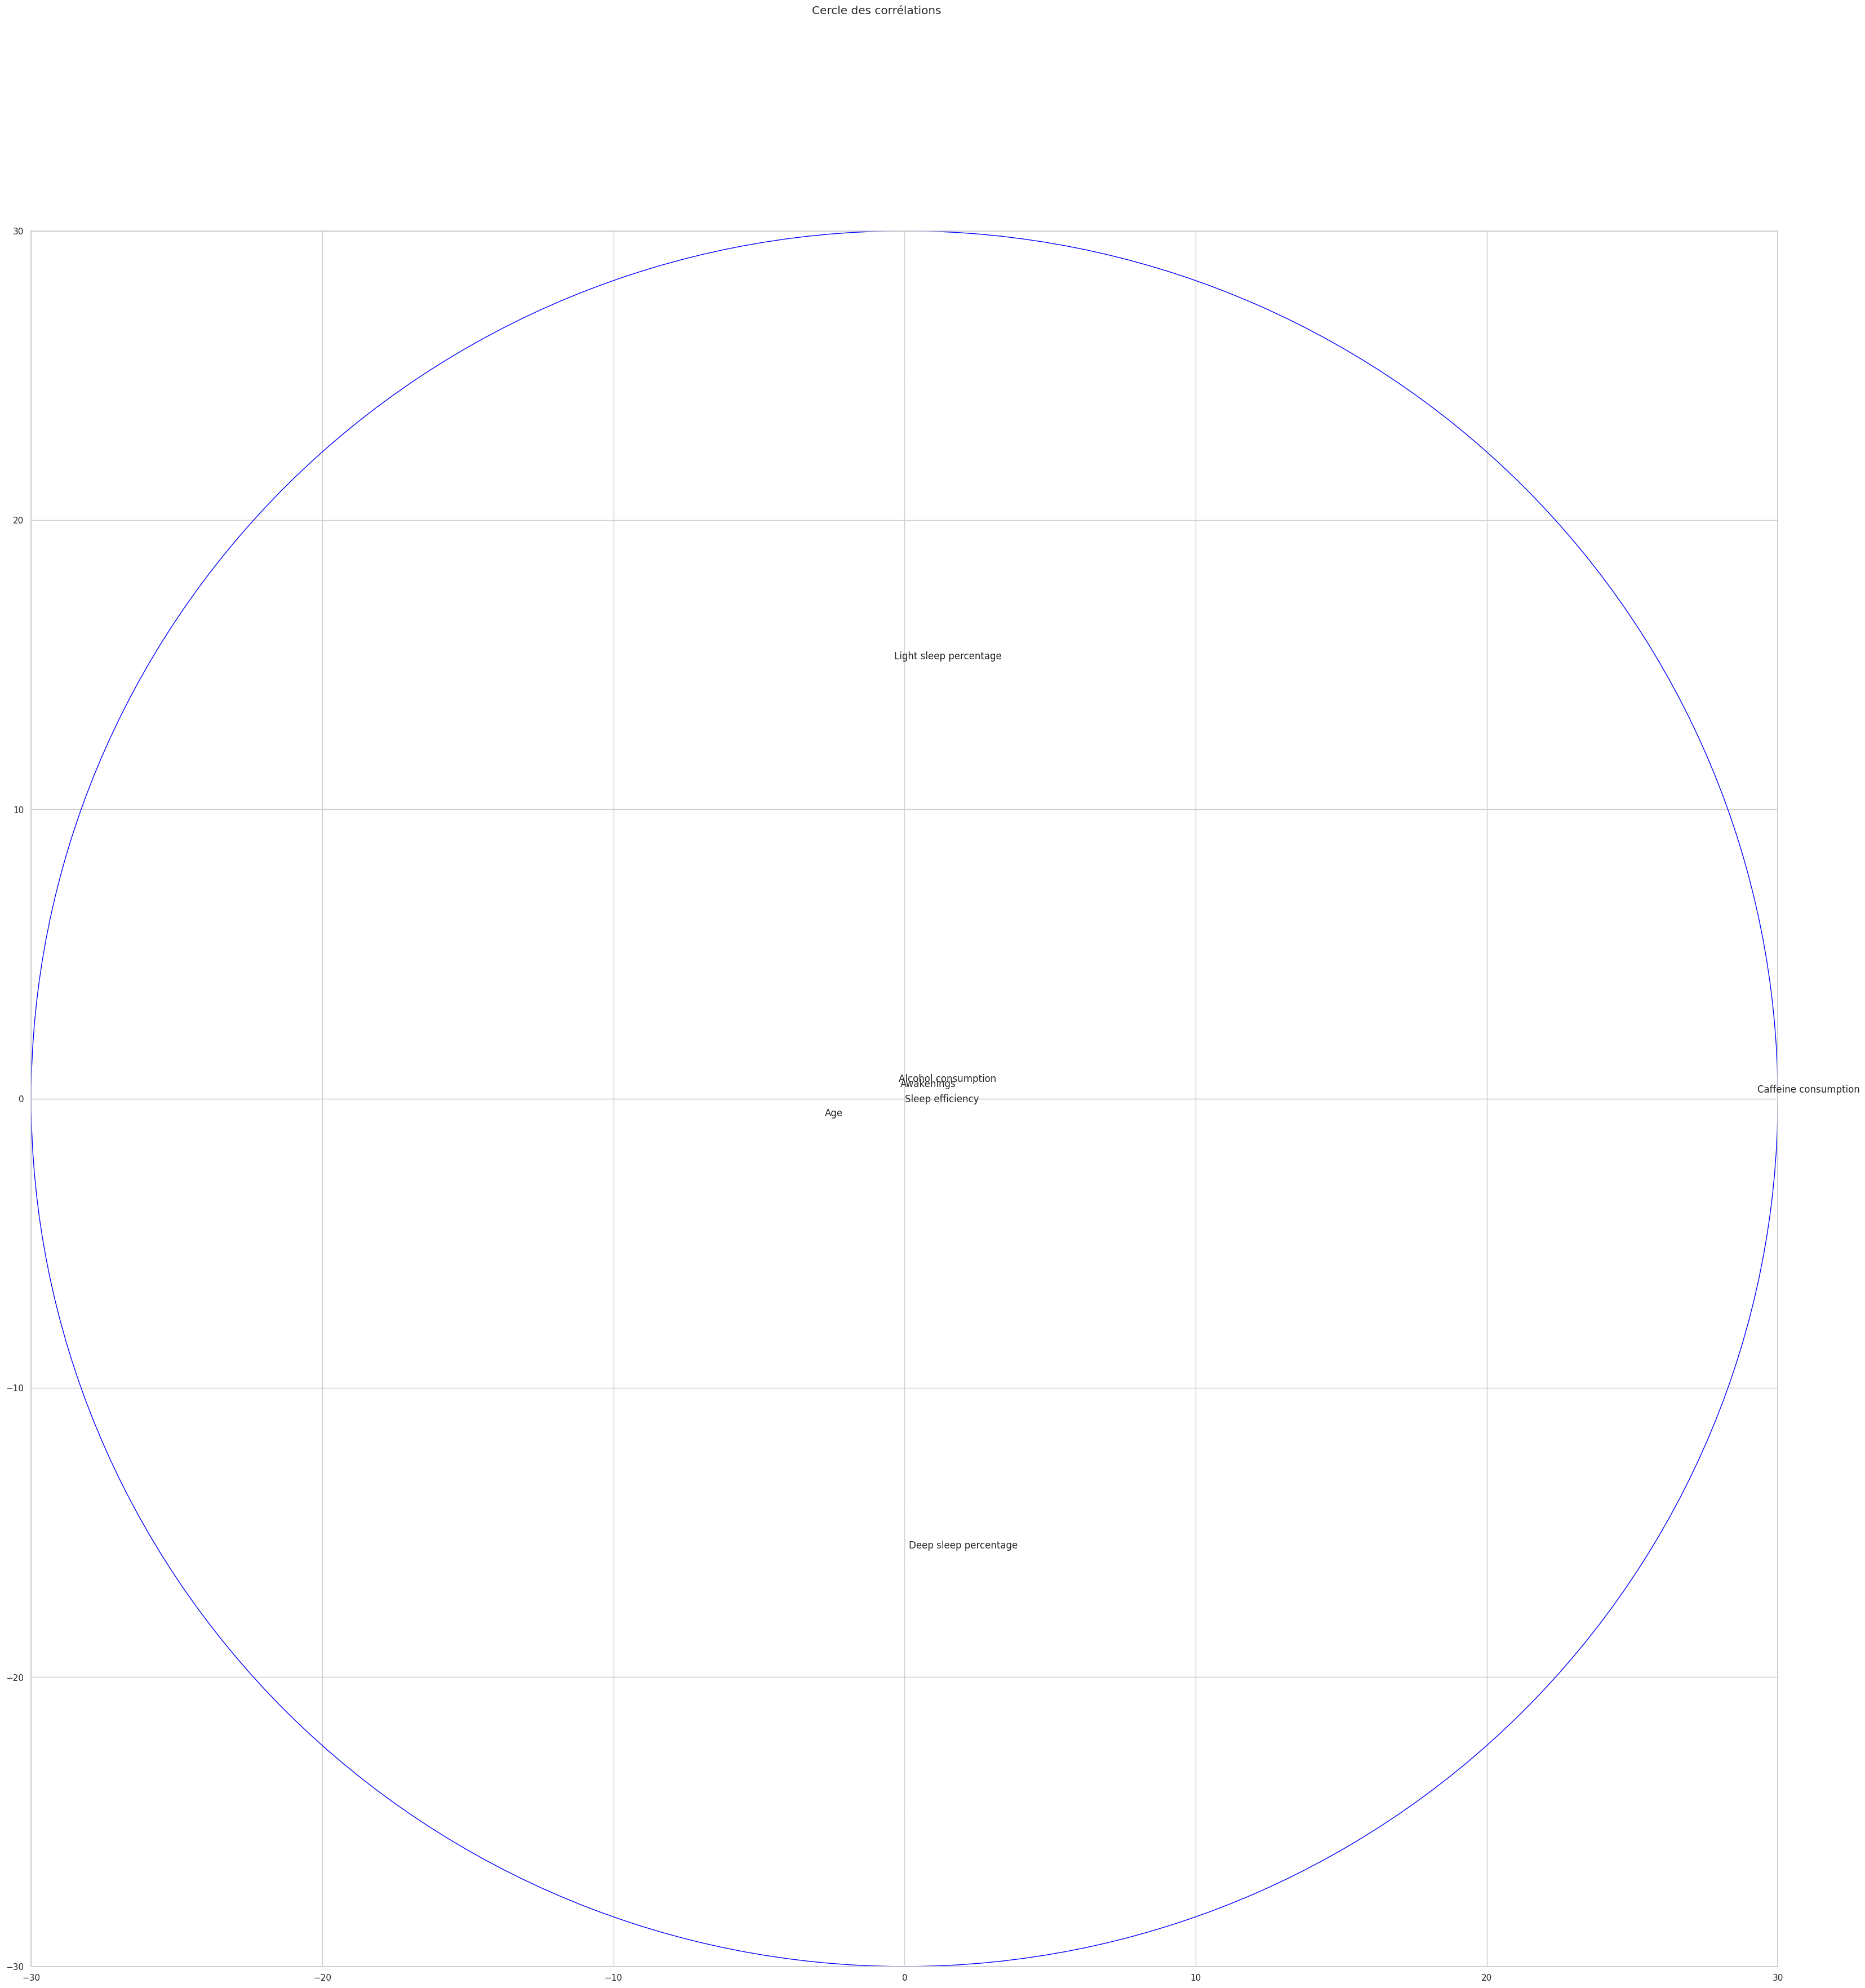

In [272]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize=(40, 40))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-30, 30)
axes.set_ylim(-30, 30)

# Ajout des axes
axes.axvline(x=0, color='lightgray', linestyle='--', linewidth=1)
axes.axhline(y=0, color='lightgray', linestyle='--', linewidth=1)

# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j], coordvar["COR_2"][j], coordvar["id"][j])

# Ajout du cercle
plt.gca().add_artist(plt.Circle((0, 0), 30, color='blue', fill=False))

plt.show()

Le fait que les facteurs externes de cette étude soient des données catégorielles a permit de crer des clusters naturellement 

Les personnes qui sont vers le bas (légerement pas trop) ont la plus haute sleep efficiency du dataset 

Les consommateurs de café sont classés de gauche à droite (de ceux qui boivent le moins à ceux qui boivent le plus de café) qui nous font penser aux classes (0 cl, 25 cl, 50cl, 75cl, 1L et 2L)

Les gens classés en haut sont ceux qui ont un sommeil léger et ceux vers le bas ont un sommeil plus profond 

Par exemple les deux personnes qui consomment 2L de caffé par jour ont une bonne sleep efficiency ce qui rejoint notre étude bivarée entre ces deux variables.

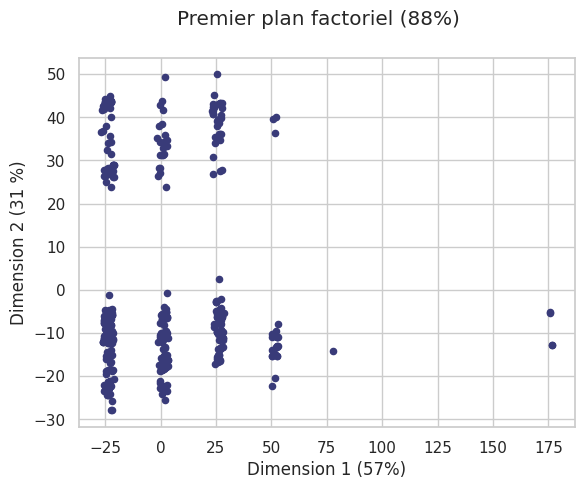

In [274]:
df_pca.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (31 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (88%)") # titre général
plt.show()

L'ACP est un modèle de machine learning qui permet de crer des groupes. Ceci a pour but de classifier les nouvelles données qu'on ajoutera au dataset set à prédir dans quelle situation ils se trouvent sans avoir à refaire les calculs. On pourraient prédir leur qualité de Sommeil et d'autres paramètres comme leur âge mais surtout leurs consommation de café et leurs appartenance au groupes (sommeils léger ou sommeils profonds) juste visuellement! 